In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch

device = "cuda:0"
torch.set_default_device(device)

from scripts.example_scripts.PCM_demo_main import run_demo

torch.Size([1, 1, 128, 128])
Range: 0.05882353335618973 to 0.9803922176361084


/tmp/ipykernel_1618934/4100306435.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  afm = cm.get_cmap('afmhot')


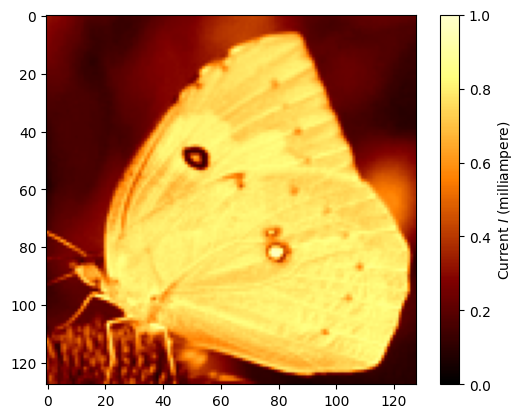

In [3]:
from PIL import Image
from torchvision.transforms import PILToTensor

J = 7
N = 1 << J

im_path = "Image_6.jpg"
im_pil = Image.open(im_path).convert('L')  # Shape 670 x 703
height, width = im_pil.size
im_pil = im_pil.resize((N, N))  # Resize to 512 x 512
# im_pil = im_pil.crop((height - 512, 0, height, 512))  # Crop to 512 x 512
im_tensor = PILToTensor()(im_pil).unsqueeze(0) / 255  # (1,1,H,W)
print(im_tensor.shape)
print(f'Range: {im_tensor.min().item()} to {im_tensor.max().item()}')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

# from matplotlib.colors import LinearSegmentedColormap
# # tweak the hex stops to taste
# stops = [
#     (0.00, "#000000"),
#     (0.08, "#140000"),  # near-black red
#     (0.20, "#3b0000"),  # very dark red
#     (0.35, "#6e0000"),  # deep red
#     (0.55, "#8a2616"),  # red-brown
#     (0.72, "#b45629"),  # brownish-orange
#     (0.86, "#d6a84a"),  # golden
#     (1.00, "#fff176"),  # light yellow (no white)
# ]
# cmap = LinearSegmentedColormap.from_list("black_red_to_yellow", stops, N=256)

data_minmax = (0.0, 1.0)


# take only the lower 0–90% of afmhot to avoid the white top
afm = cm.get_cmap('afmhot')
cmap = ListedColormap(afm(np.linspace(0.0, 0.90, 256)))

import matplotlib.pyplot as plt
plt.imshow(im_tensor.squeeze().cpu(), cmap=cmap, clim=data_minmax)
plt.colorbar(label=r'Current $I$ (milliampere)')

/tmp/ipykernel_1618934/2231931775.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


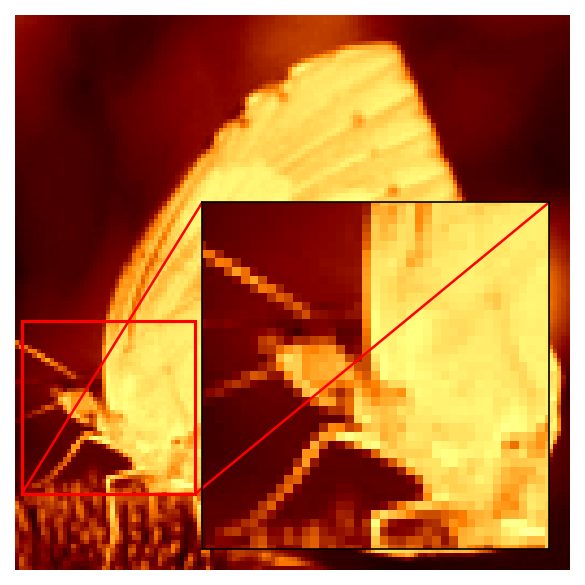

In [4]:
from plot_helper import PlotHelper


# Dummy image
# img = np.random.rand(512, 512)
img = im_tensor.squeeze().cpu().numpy()
roi = (1, 70, 40, 40)  # (x, y, w, h)
zoom = 2
plot_helper = PlotHelper(roi=roi, zoom=zoom, loc='lower right', show_rect=True, cmap=cmap, clim=data_minmax)

fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
plot_helper.add_zoom_inset(ax, img)
plt.tight_layout()
plt.show()

PnP-ADMM iterations: 100%|██████████| 10/10 [00:01<00:00,  8.08it/s]
/home/t/Documents/GIT/LION/scripts/example_scripts/PCM_demo_main.py:303: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/t/Documents/GIT/LION/scripts/example_scripts/PCM_demo_main.py:312: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/t/Documents/GIT/LION/scripts/example_scripts/PCM_demo_main.py:320: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
PnP-ADMM iterations: 100%|██████████| 10/10 [00:01<00:00,  8.85it/s]


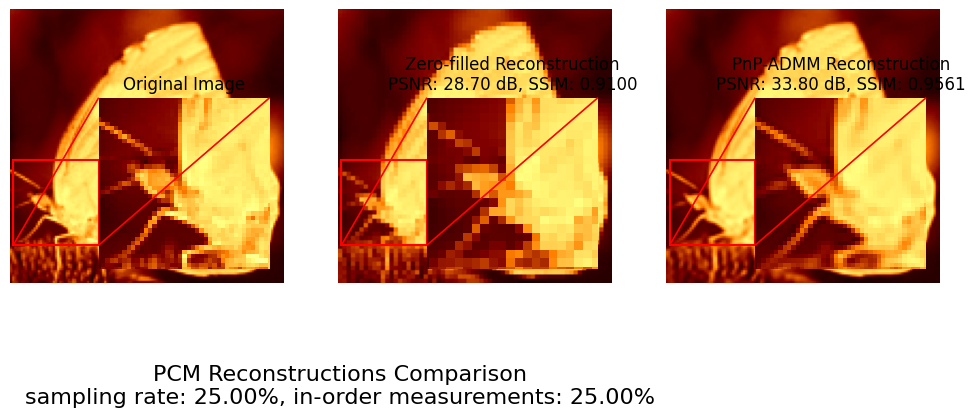

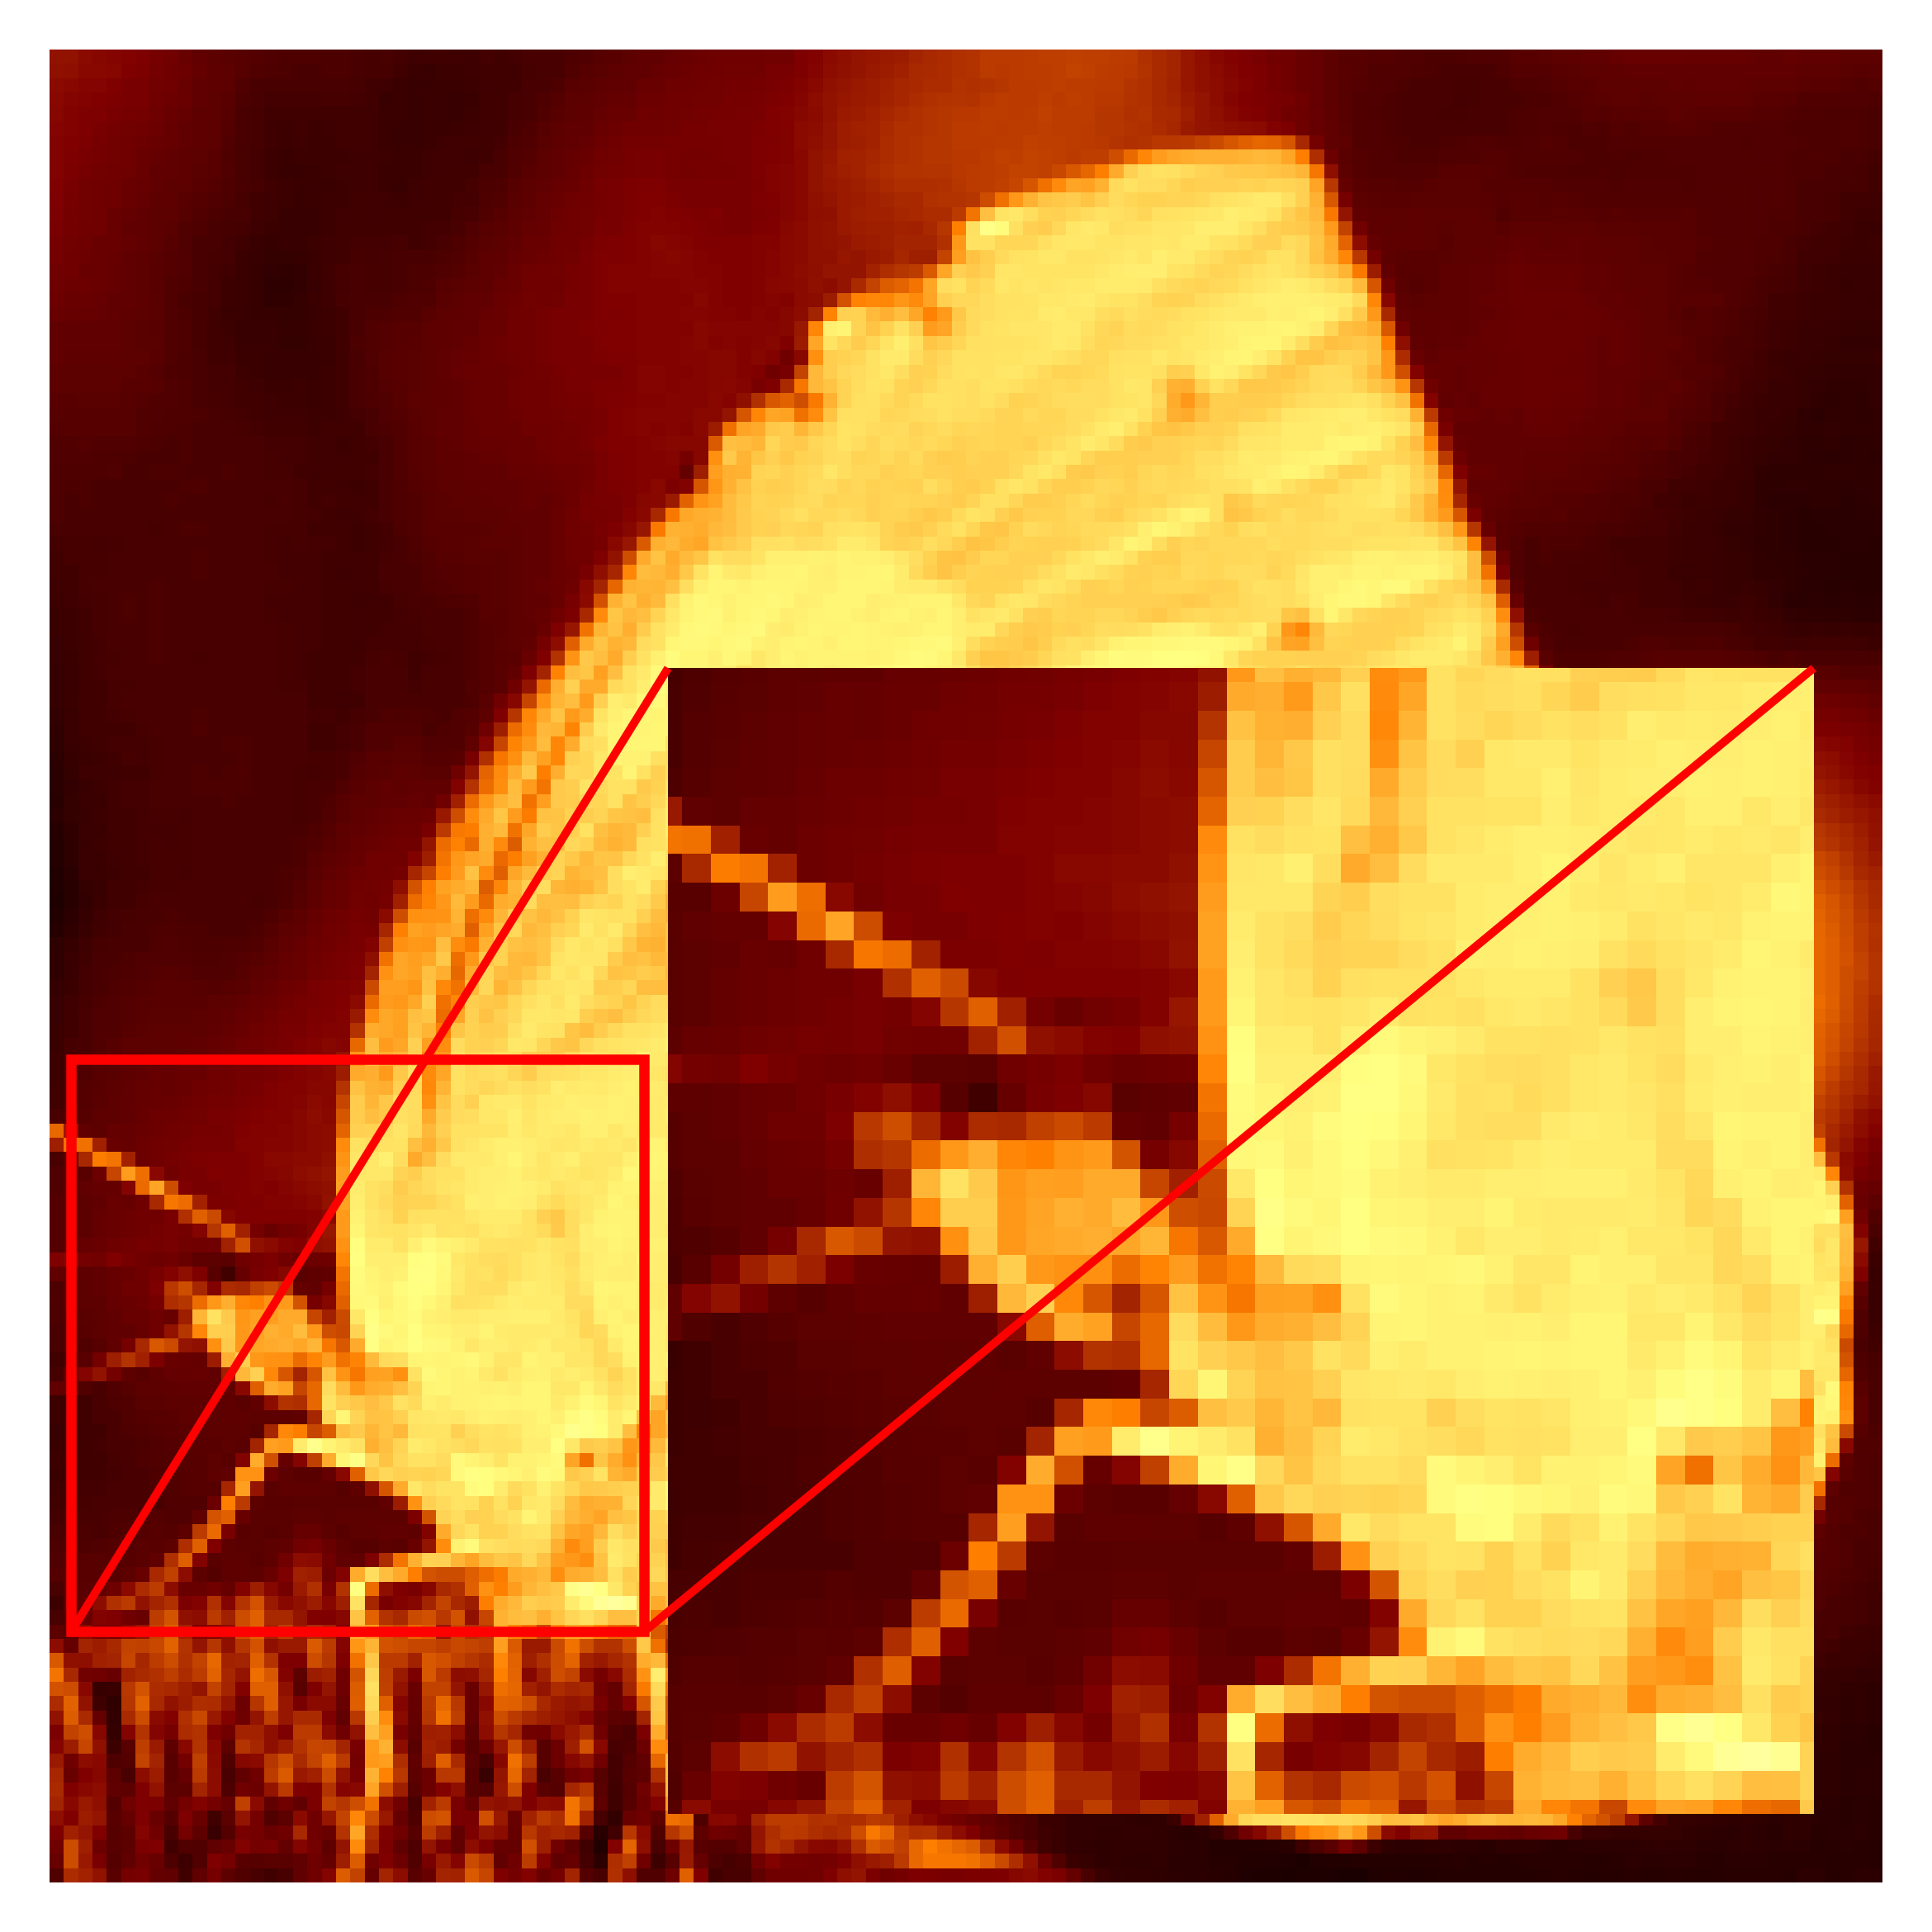

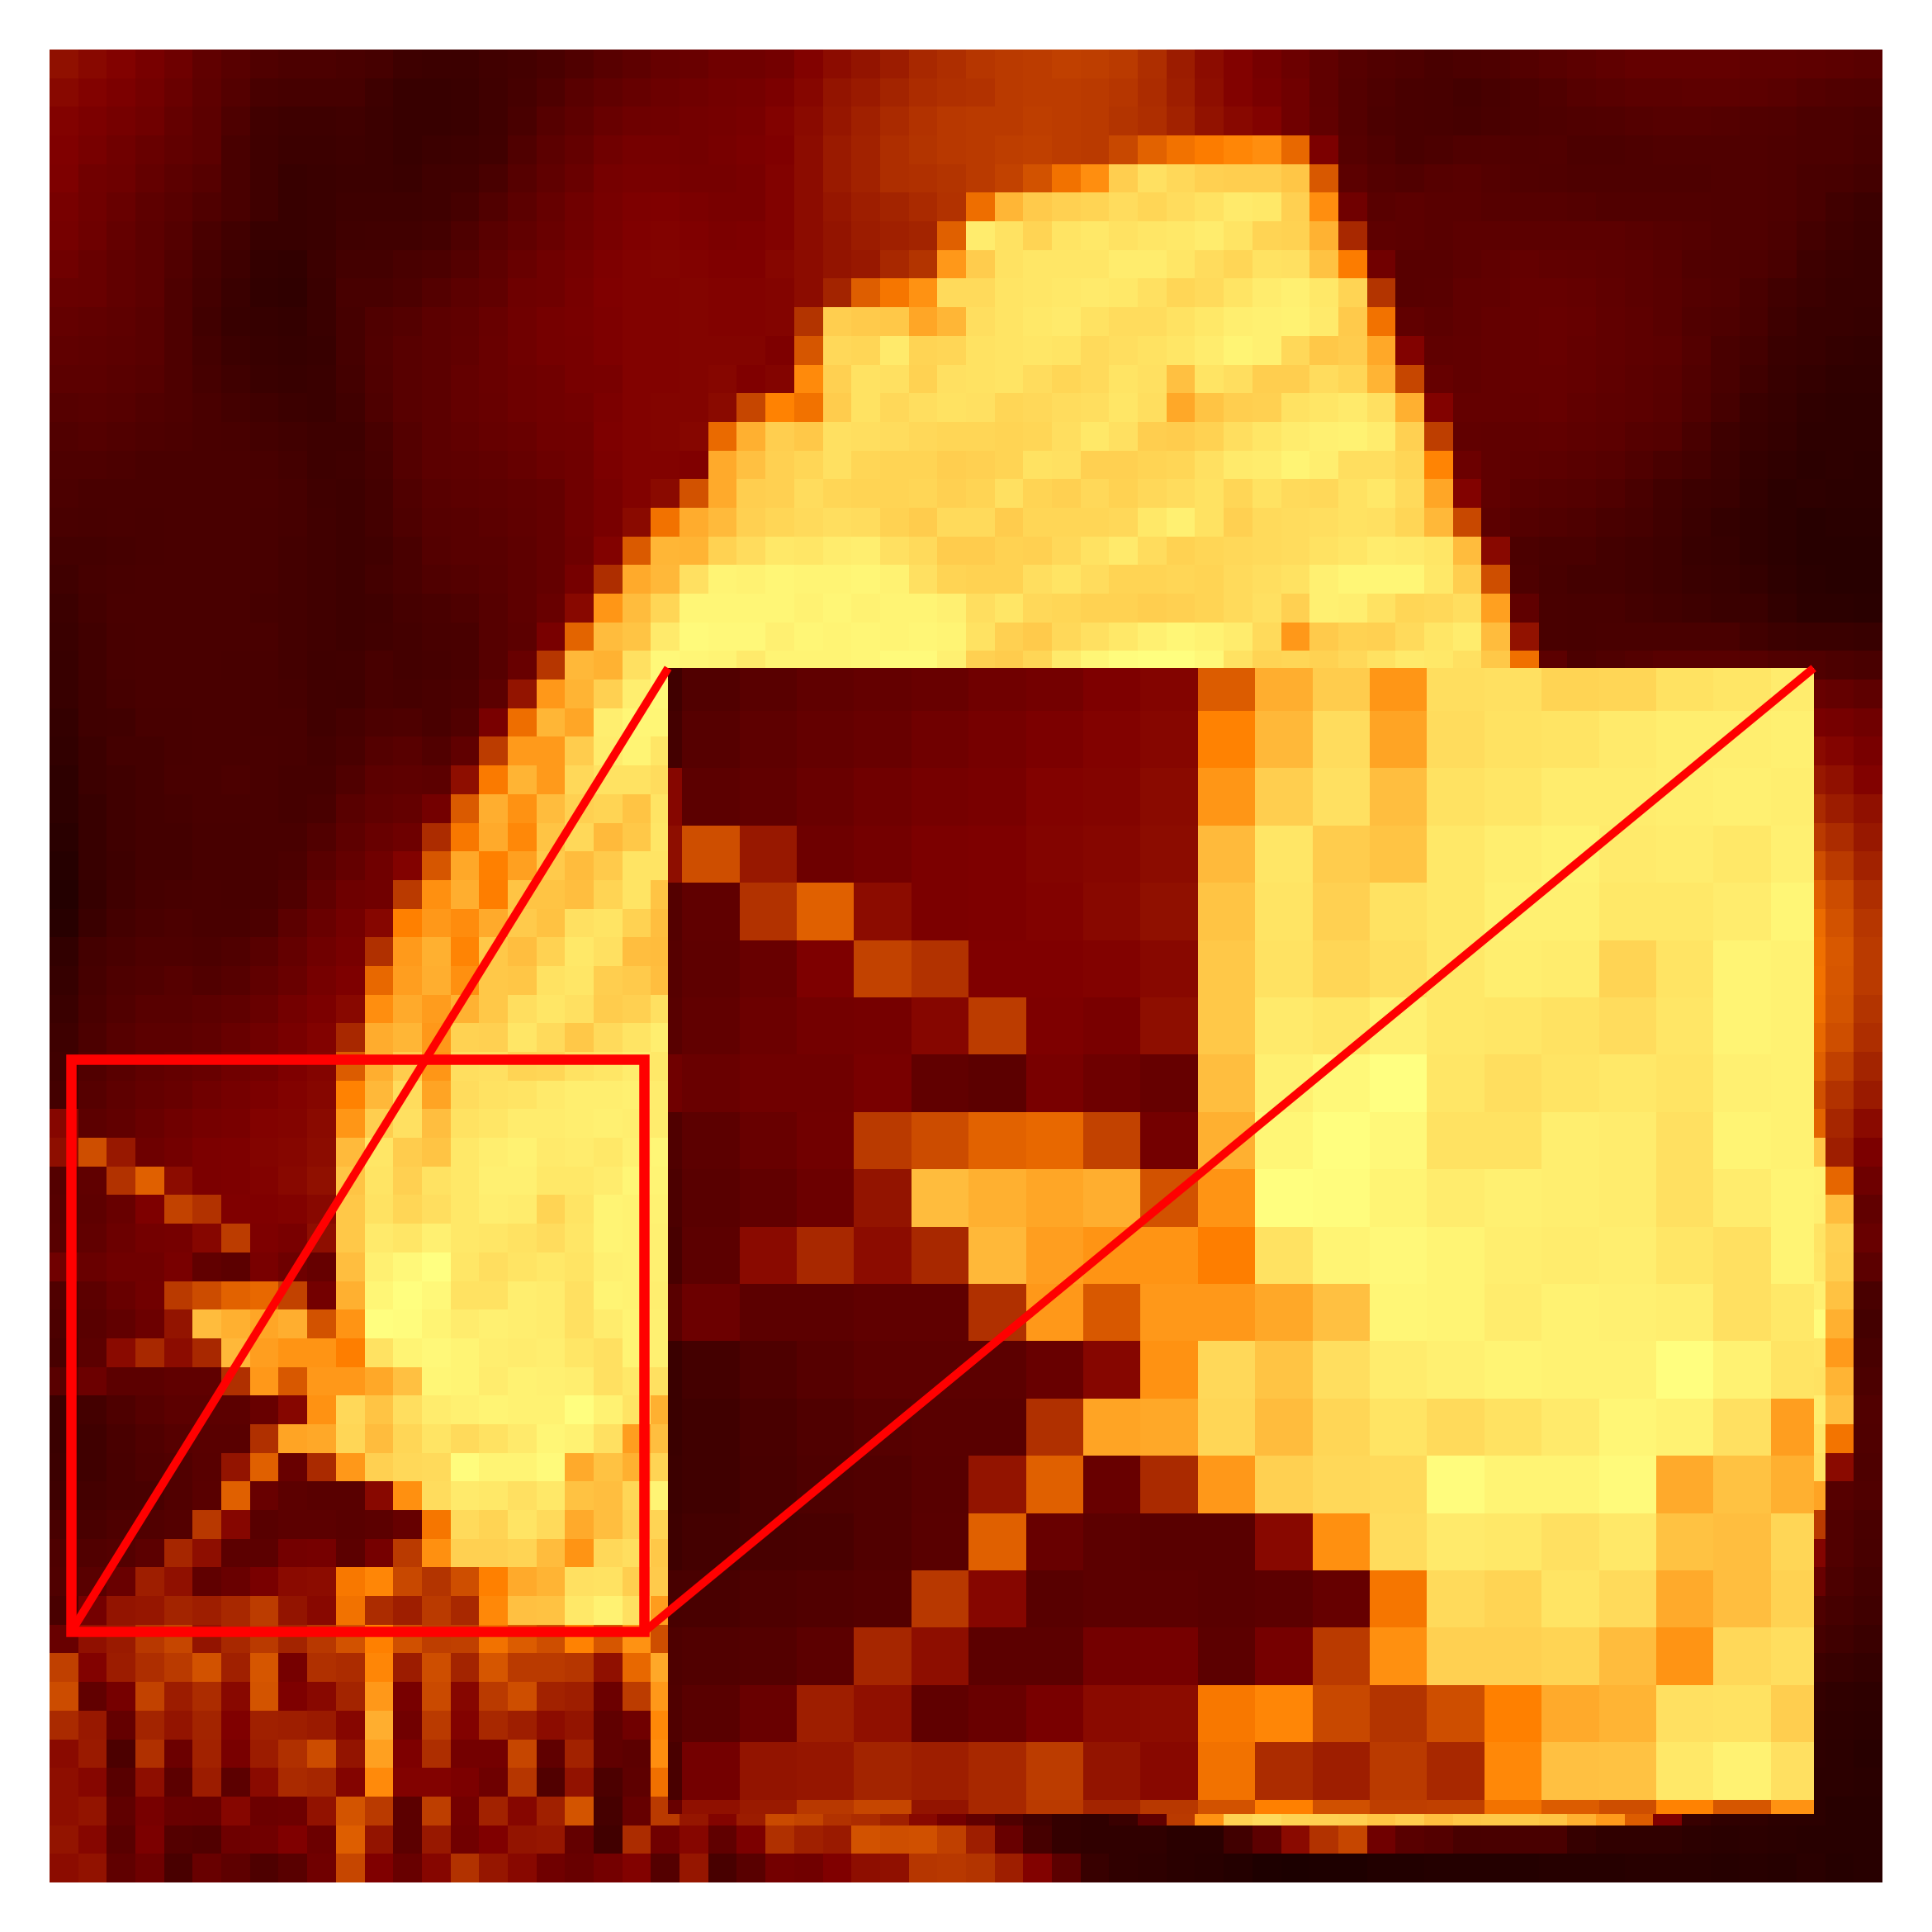

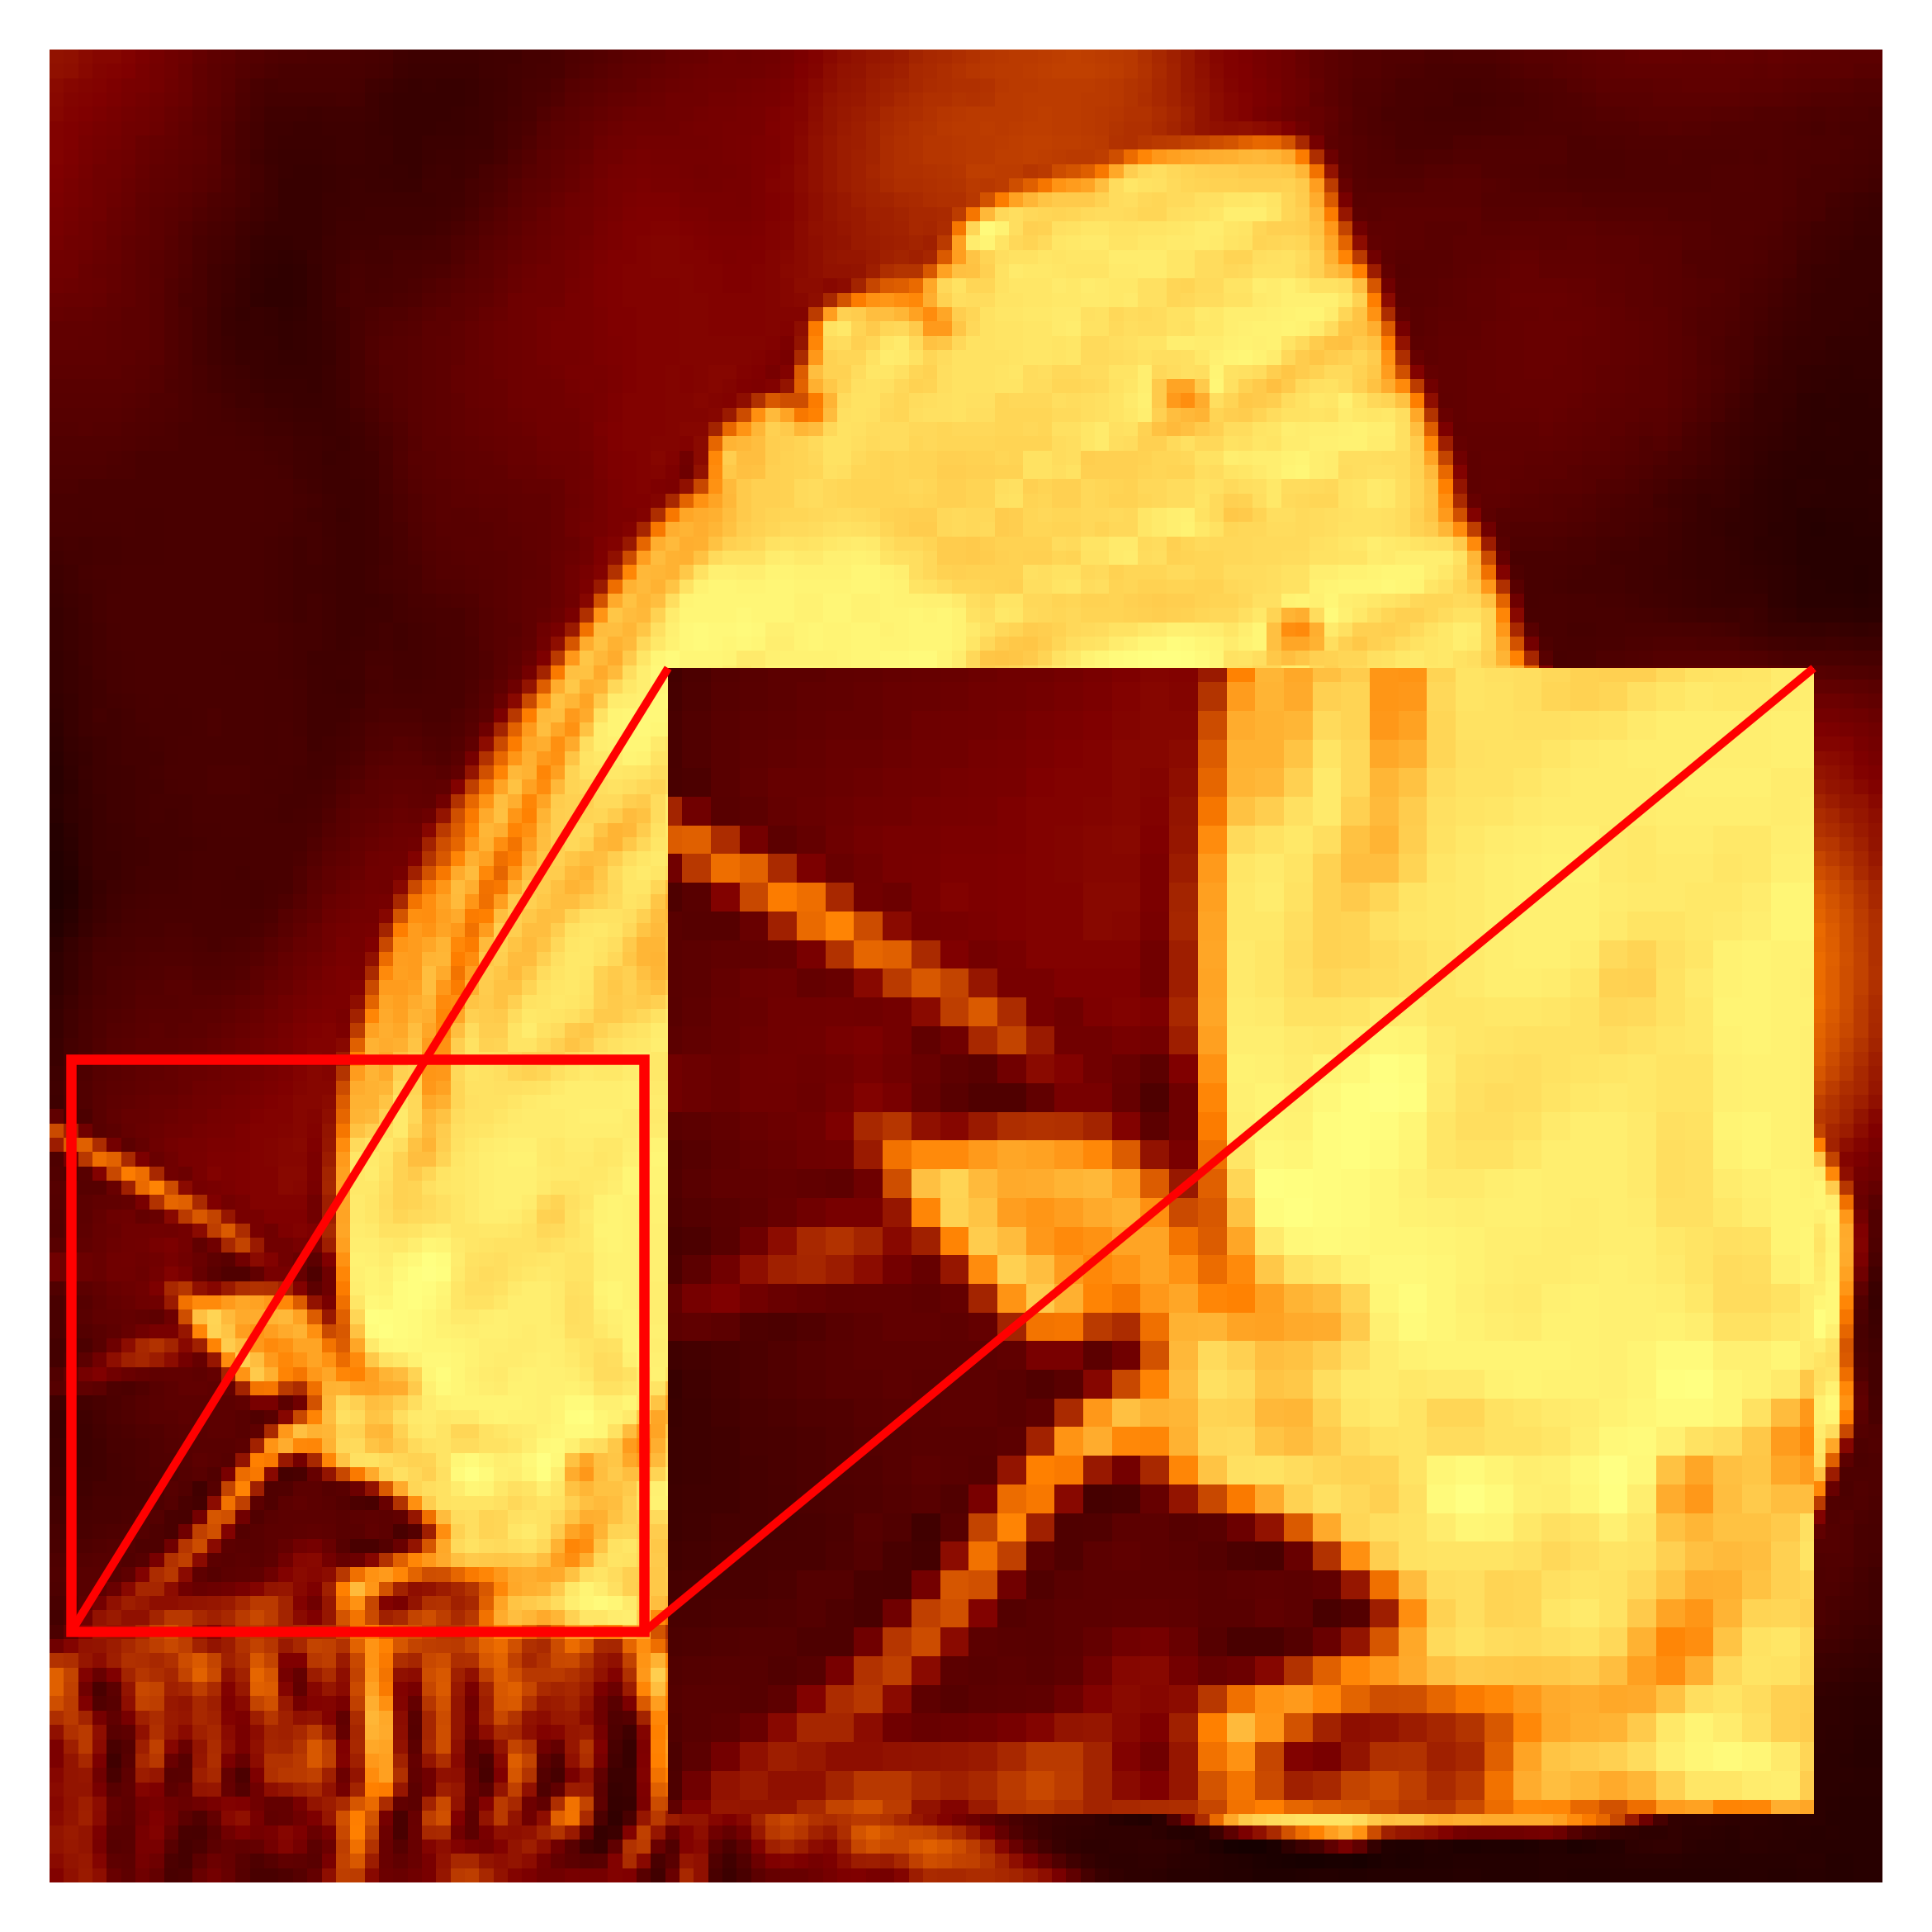

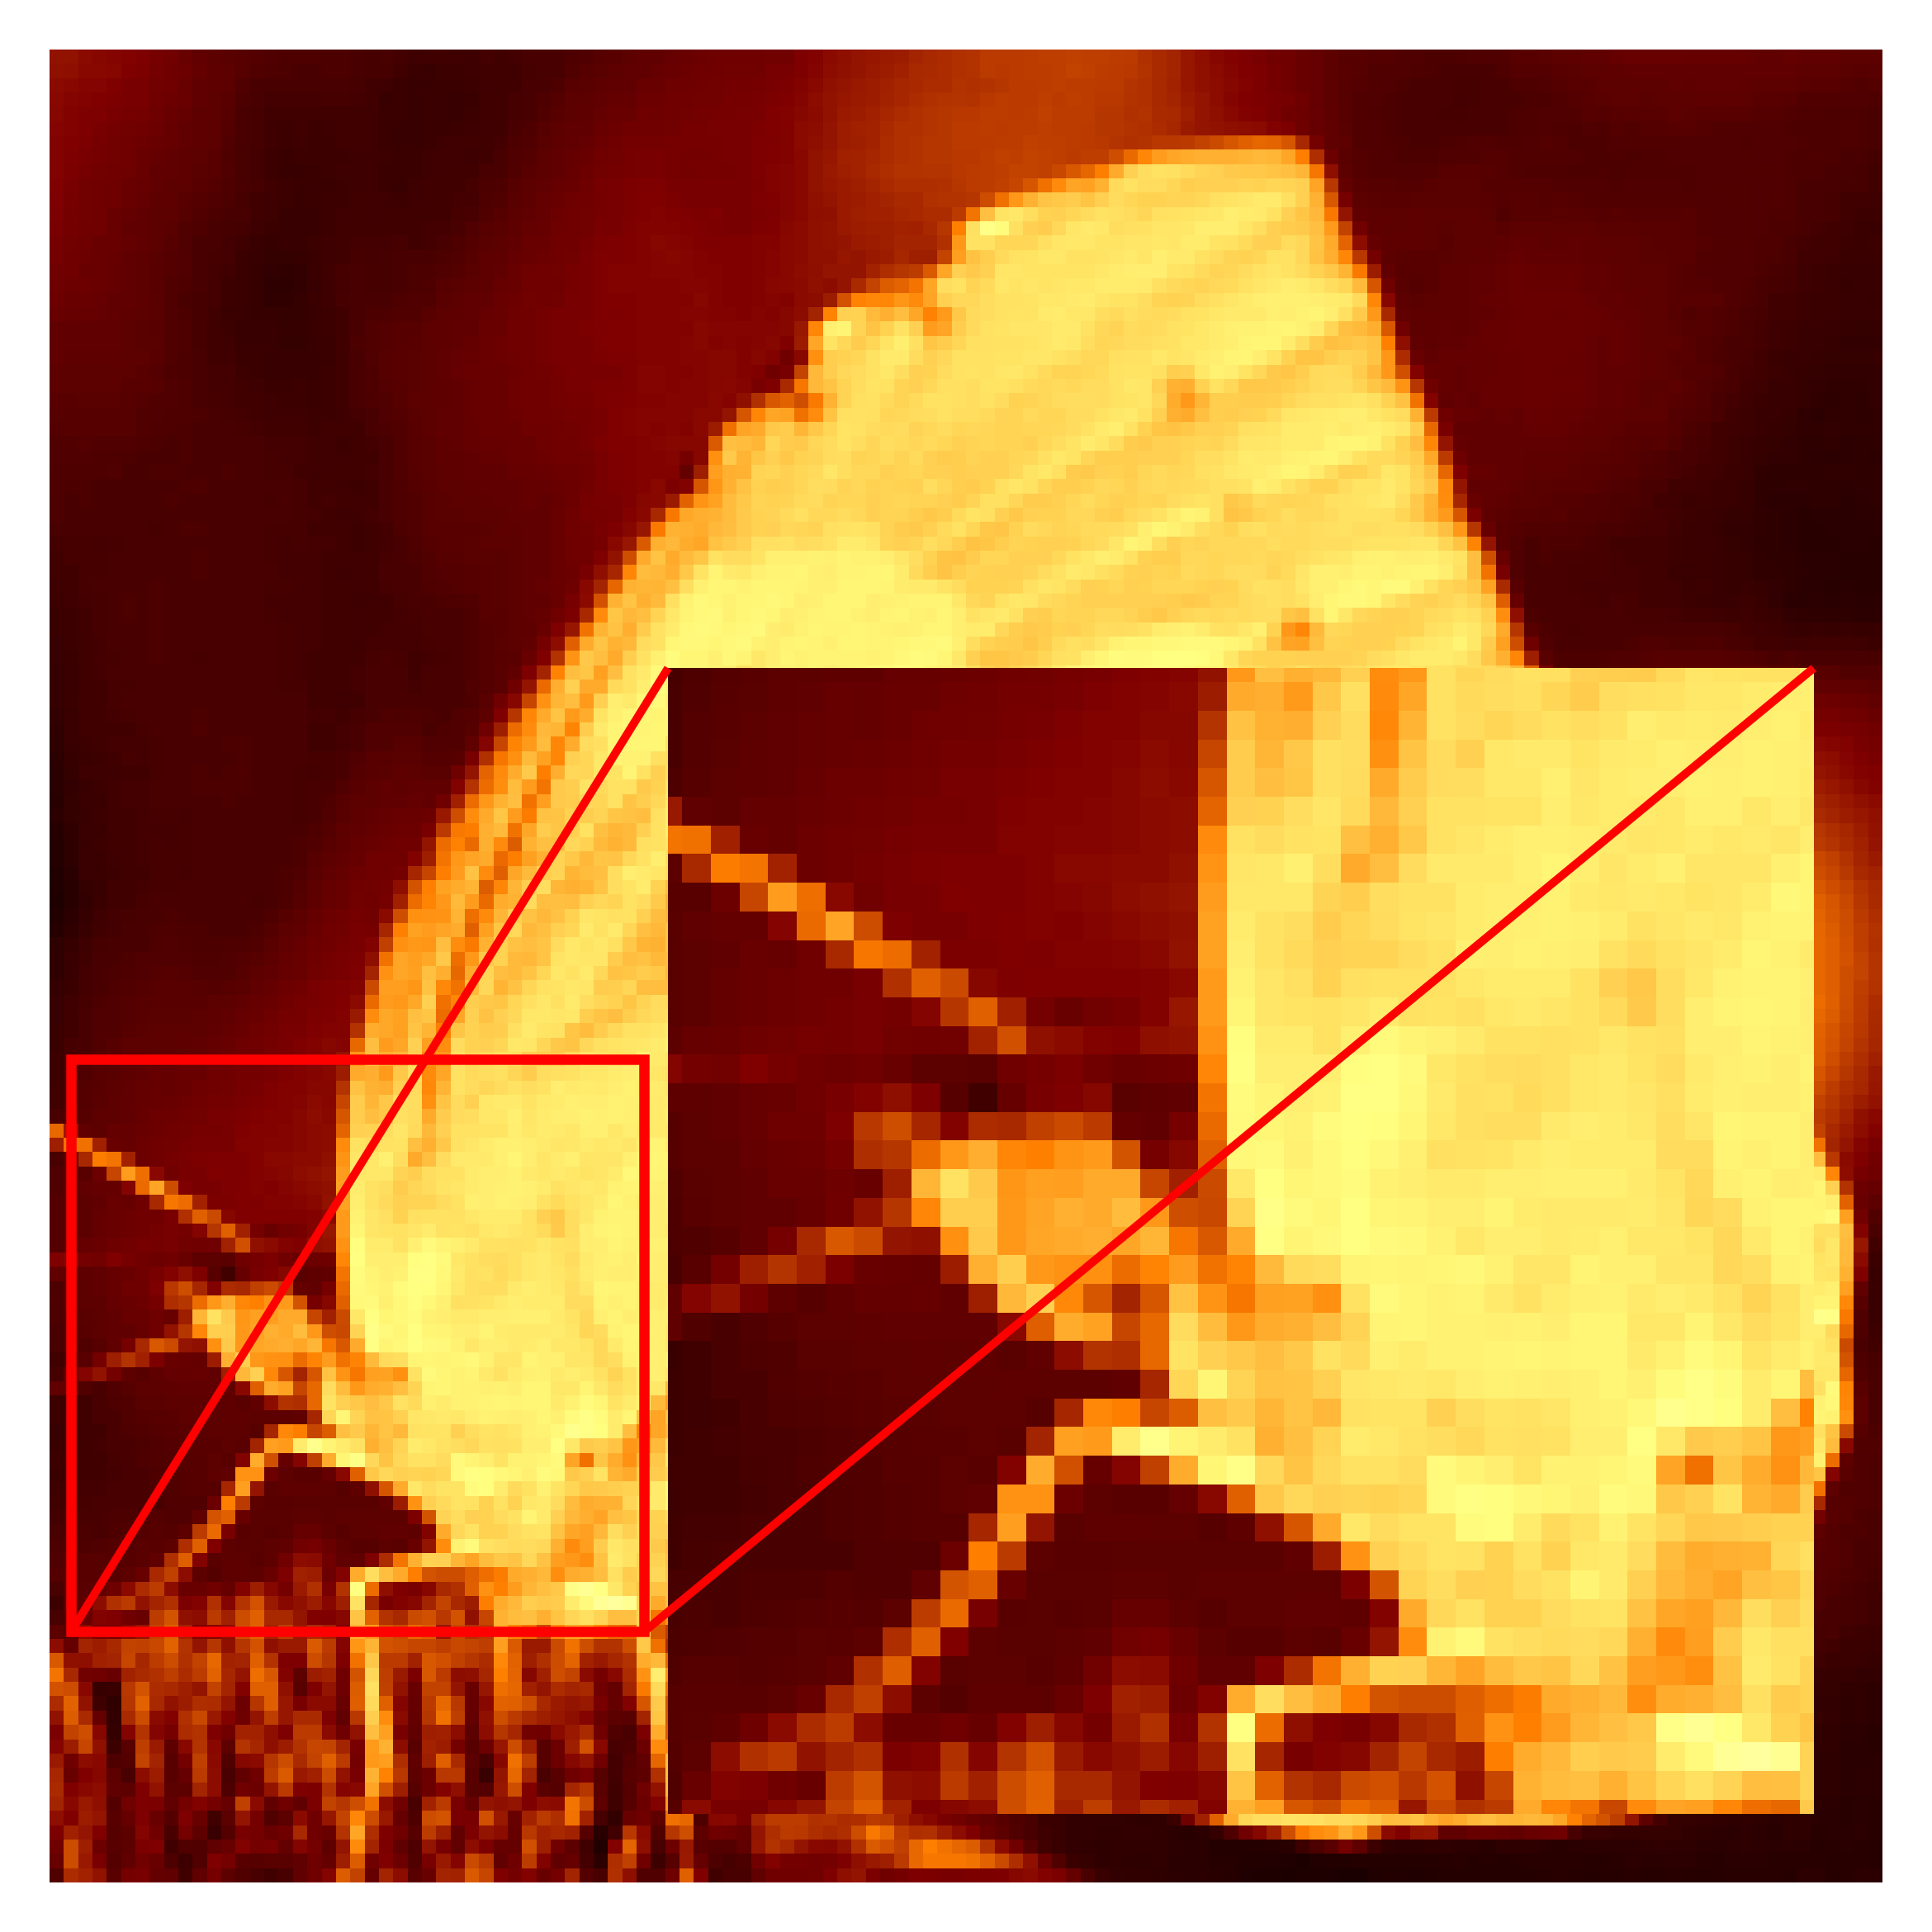

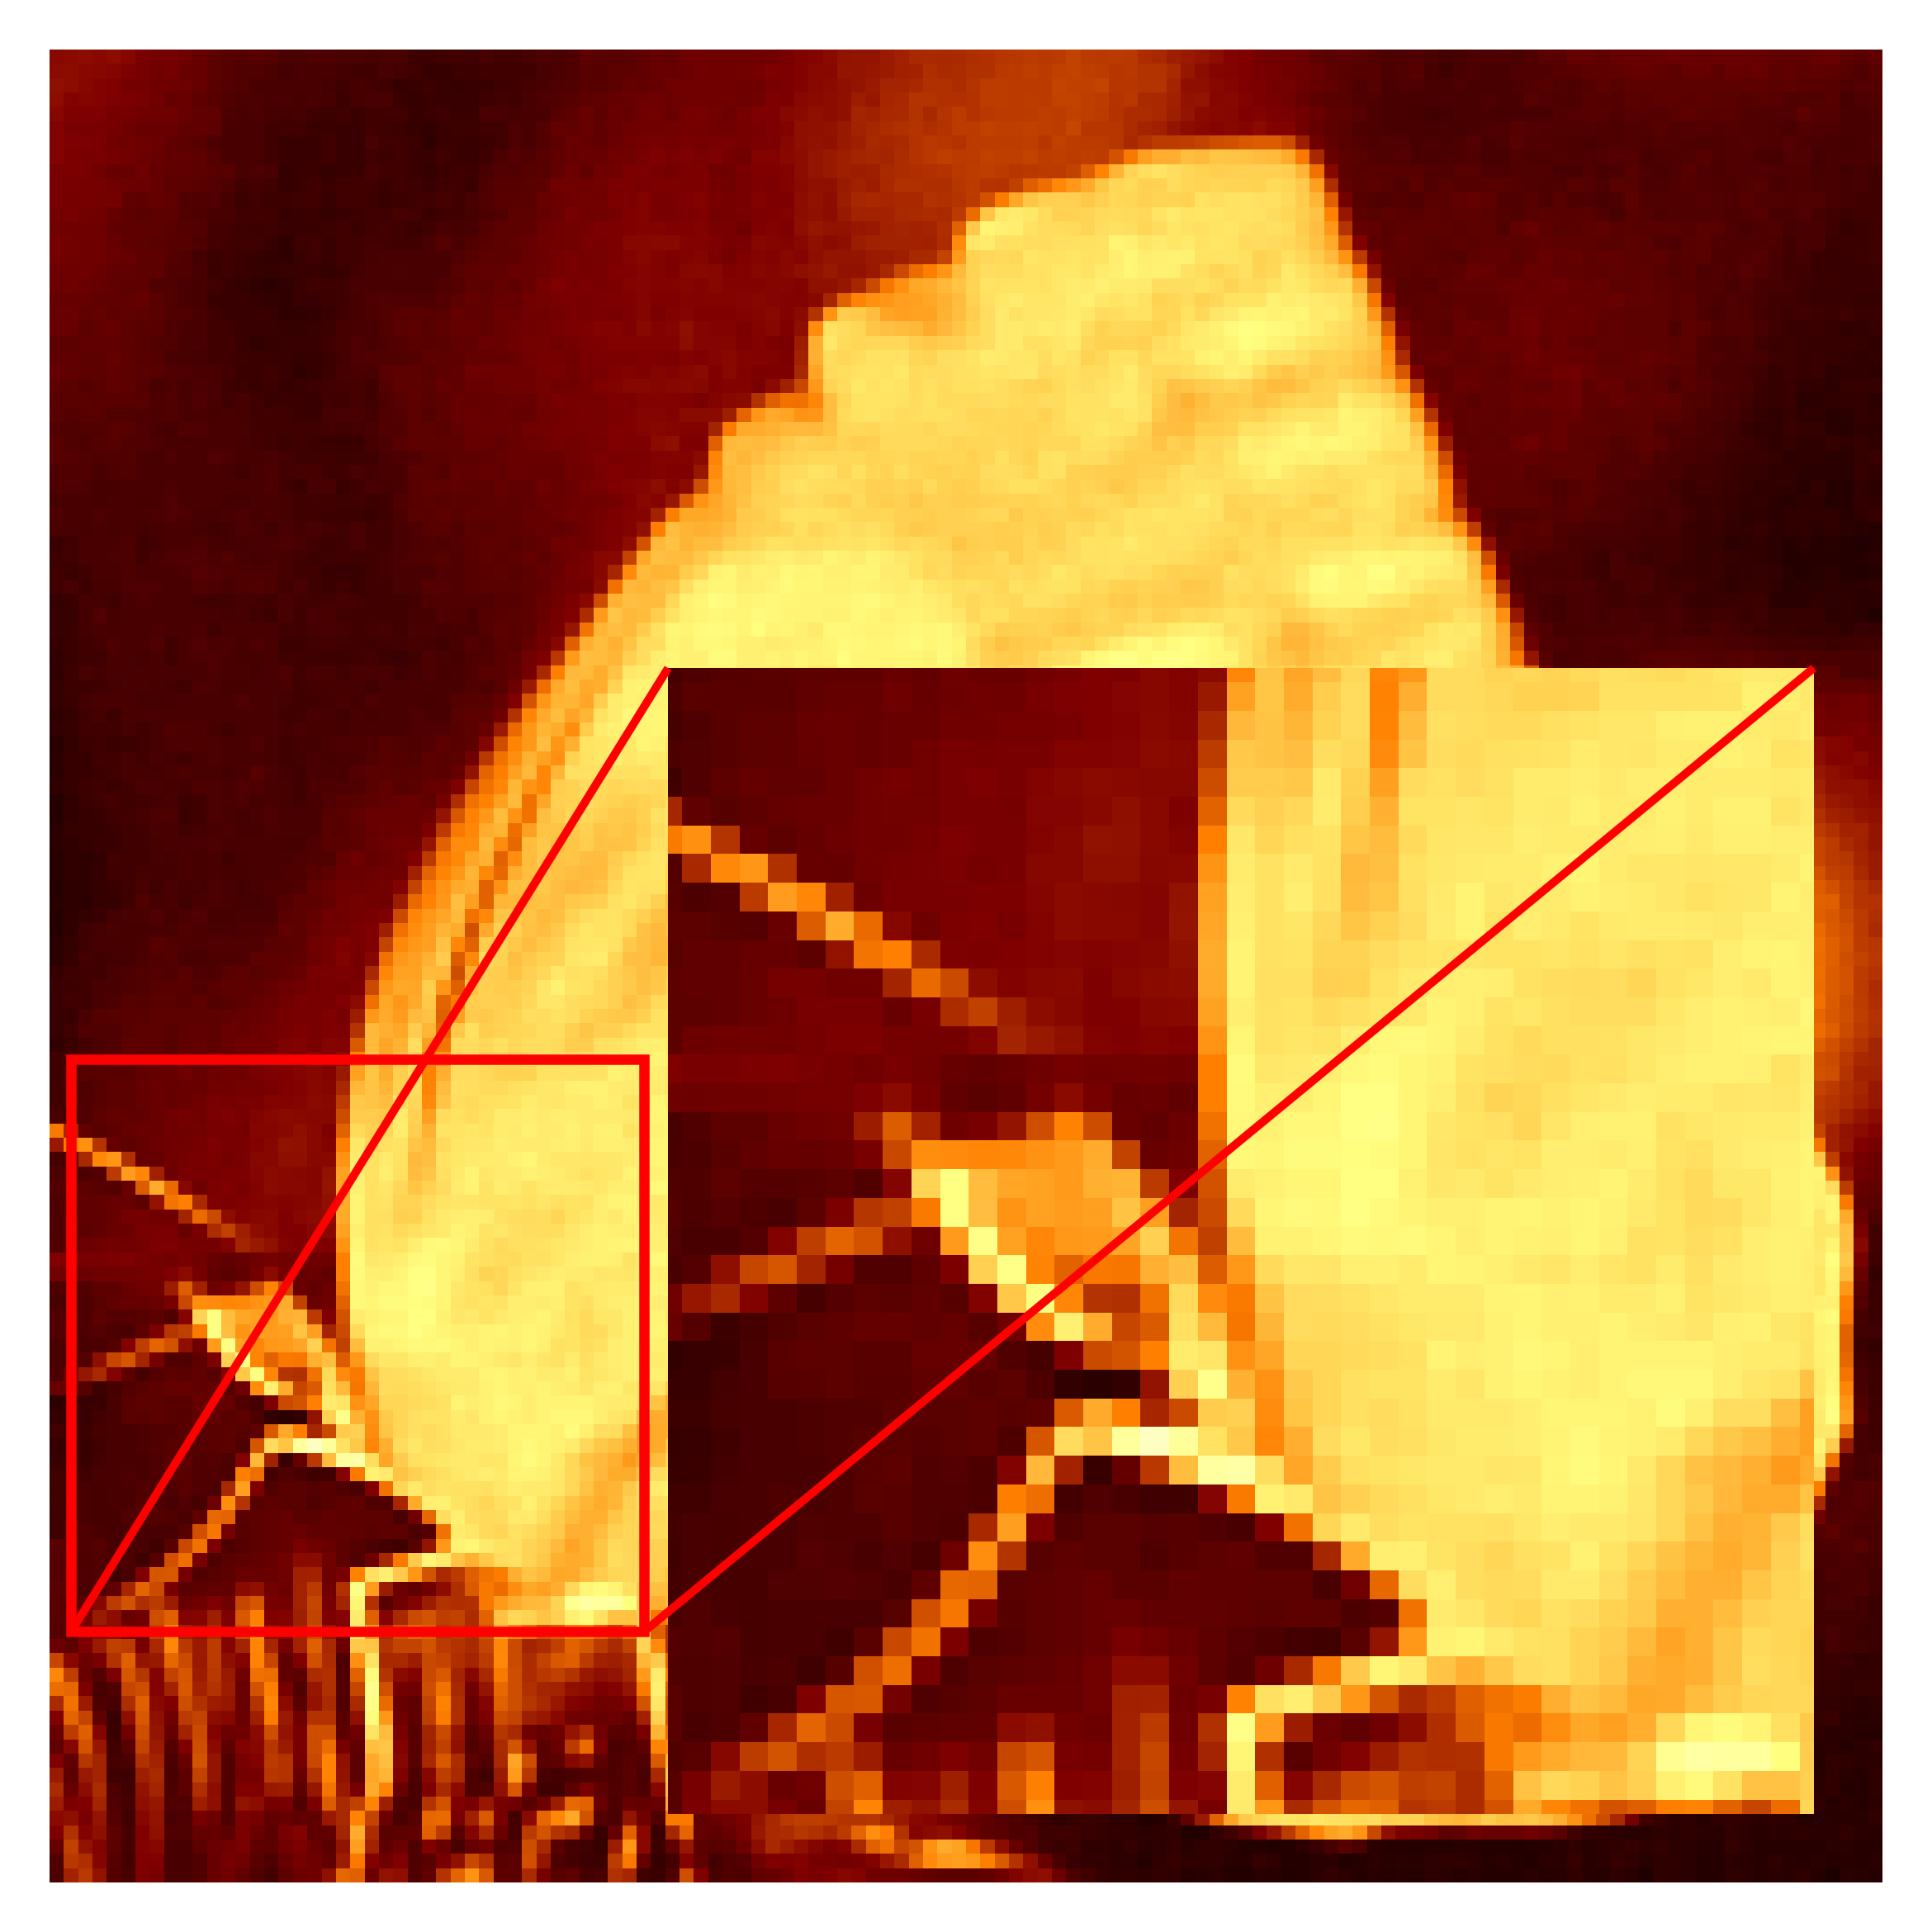

In [5]:
run_demo(plot_helper=plot_helper, im_tensor=im_tensor, J=J, data_minmax=data_minmax, subtract_from_J=1, delta_divided_by=4, sigma=50 / 255, im_name="butterfly")
run_demo(plot_helper=plot_helper, im_tensor=im_tensor, J=J, data_minmax=data_minmax, subtract_from_J=2, delta_divided_by=4, sigma=50 / 255, im_name="butterfly")

PnP-ADMM iterations: 100%|██████████| 10/10 [00:00<00:00, 10.64it/s]


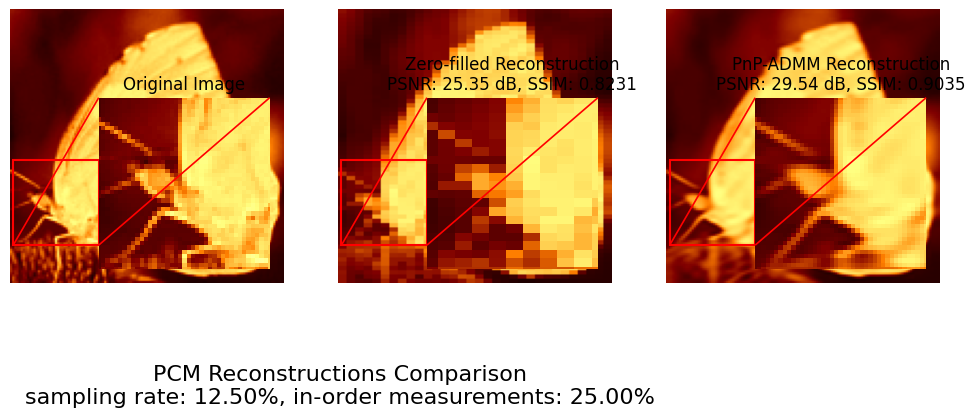

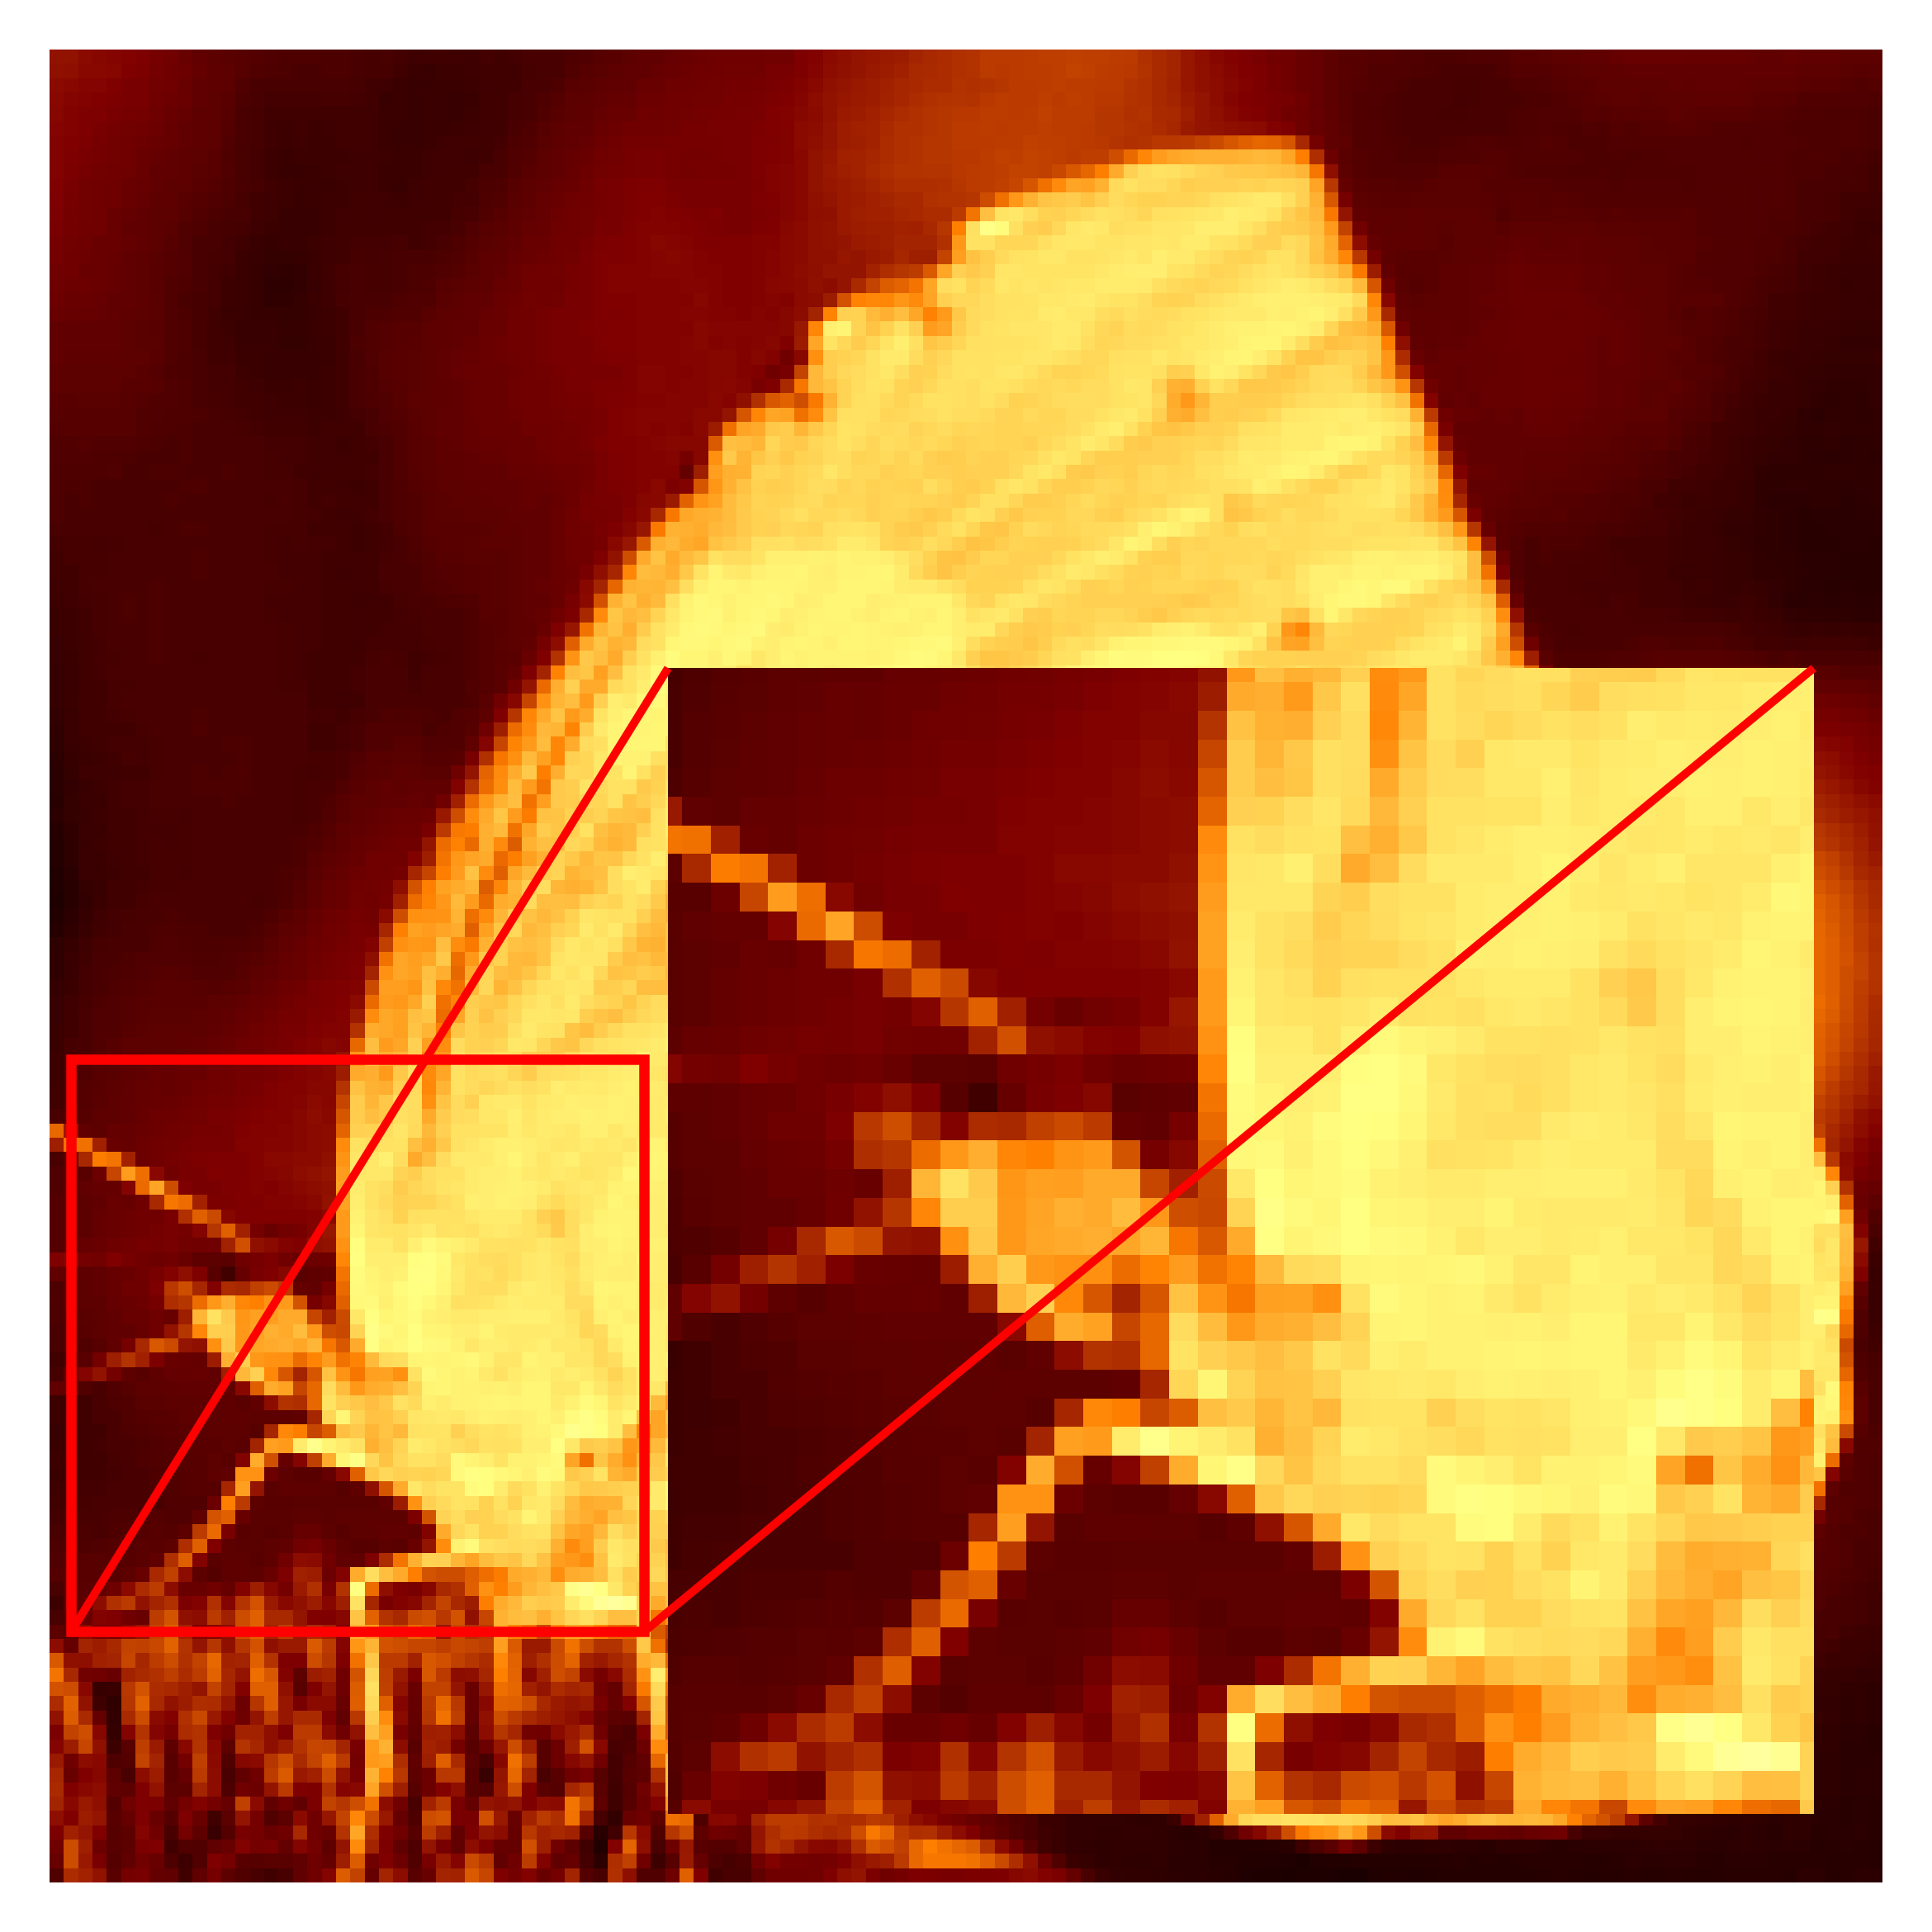

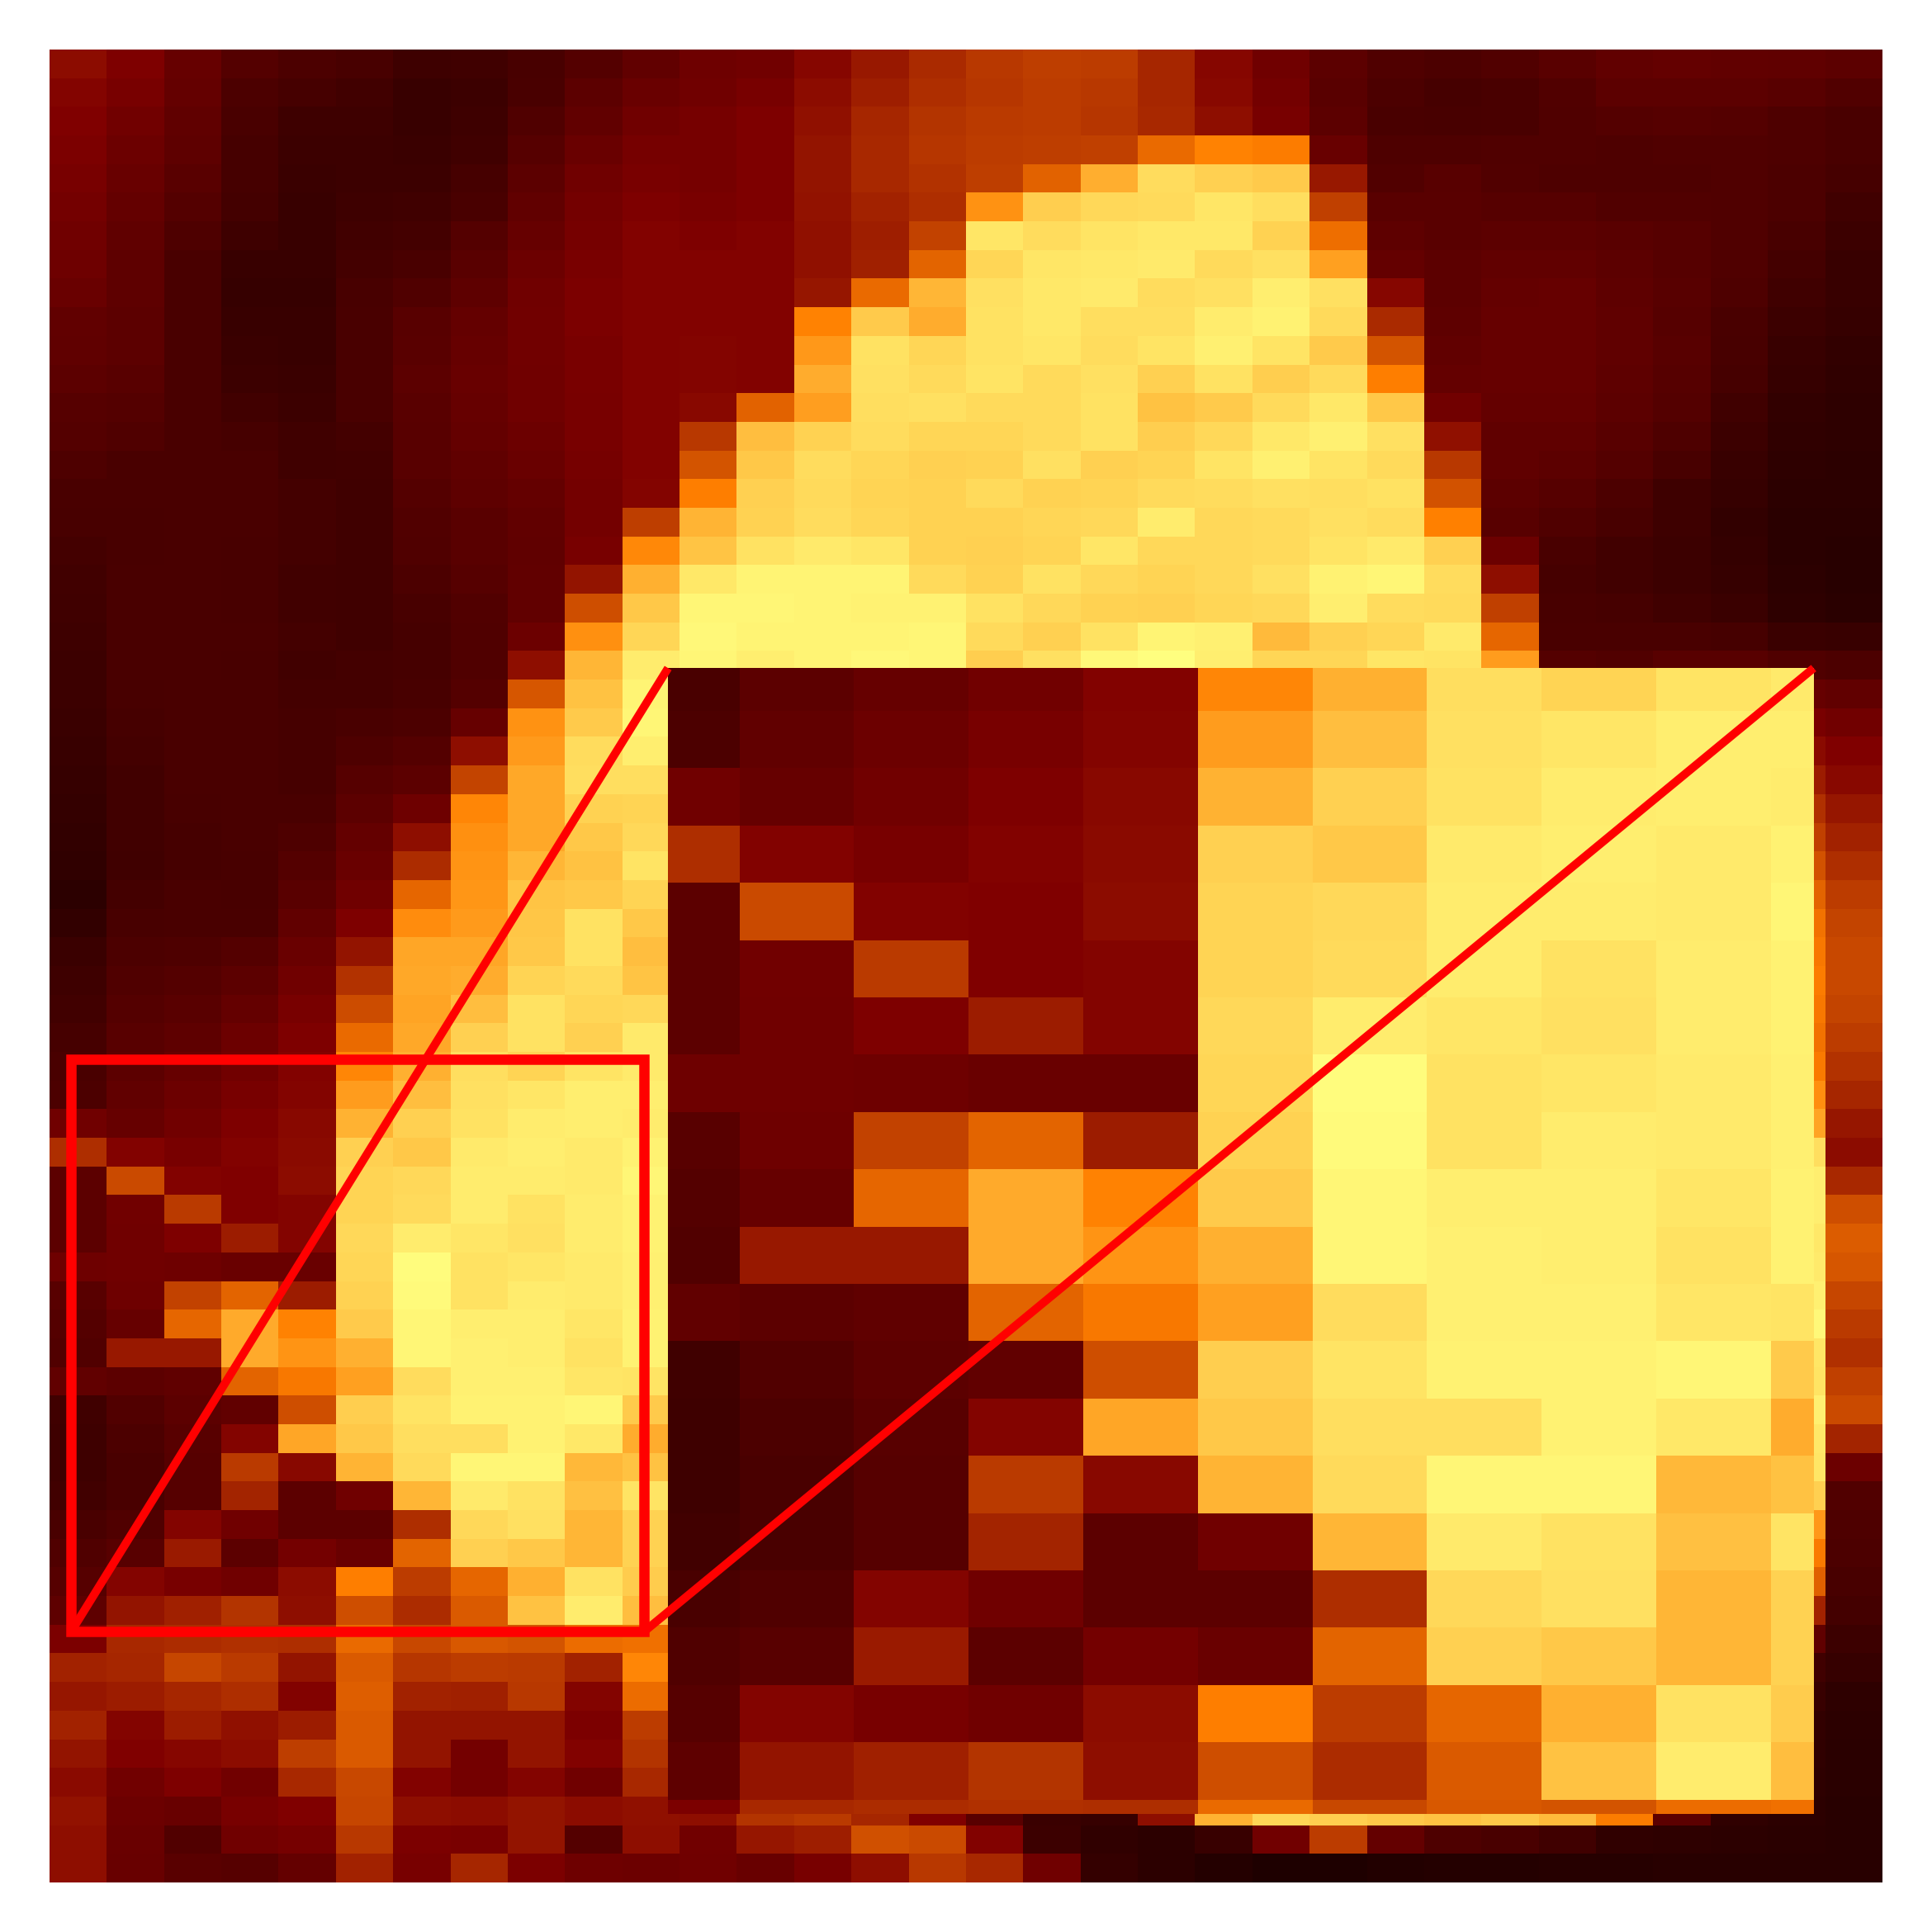

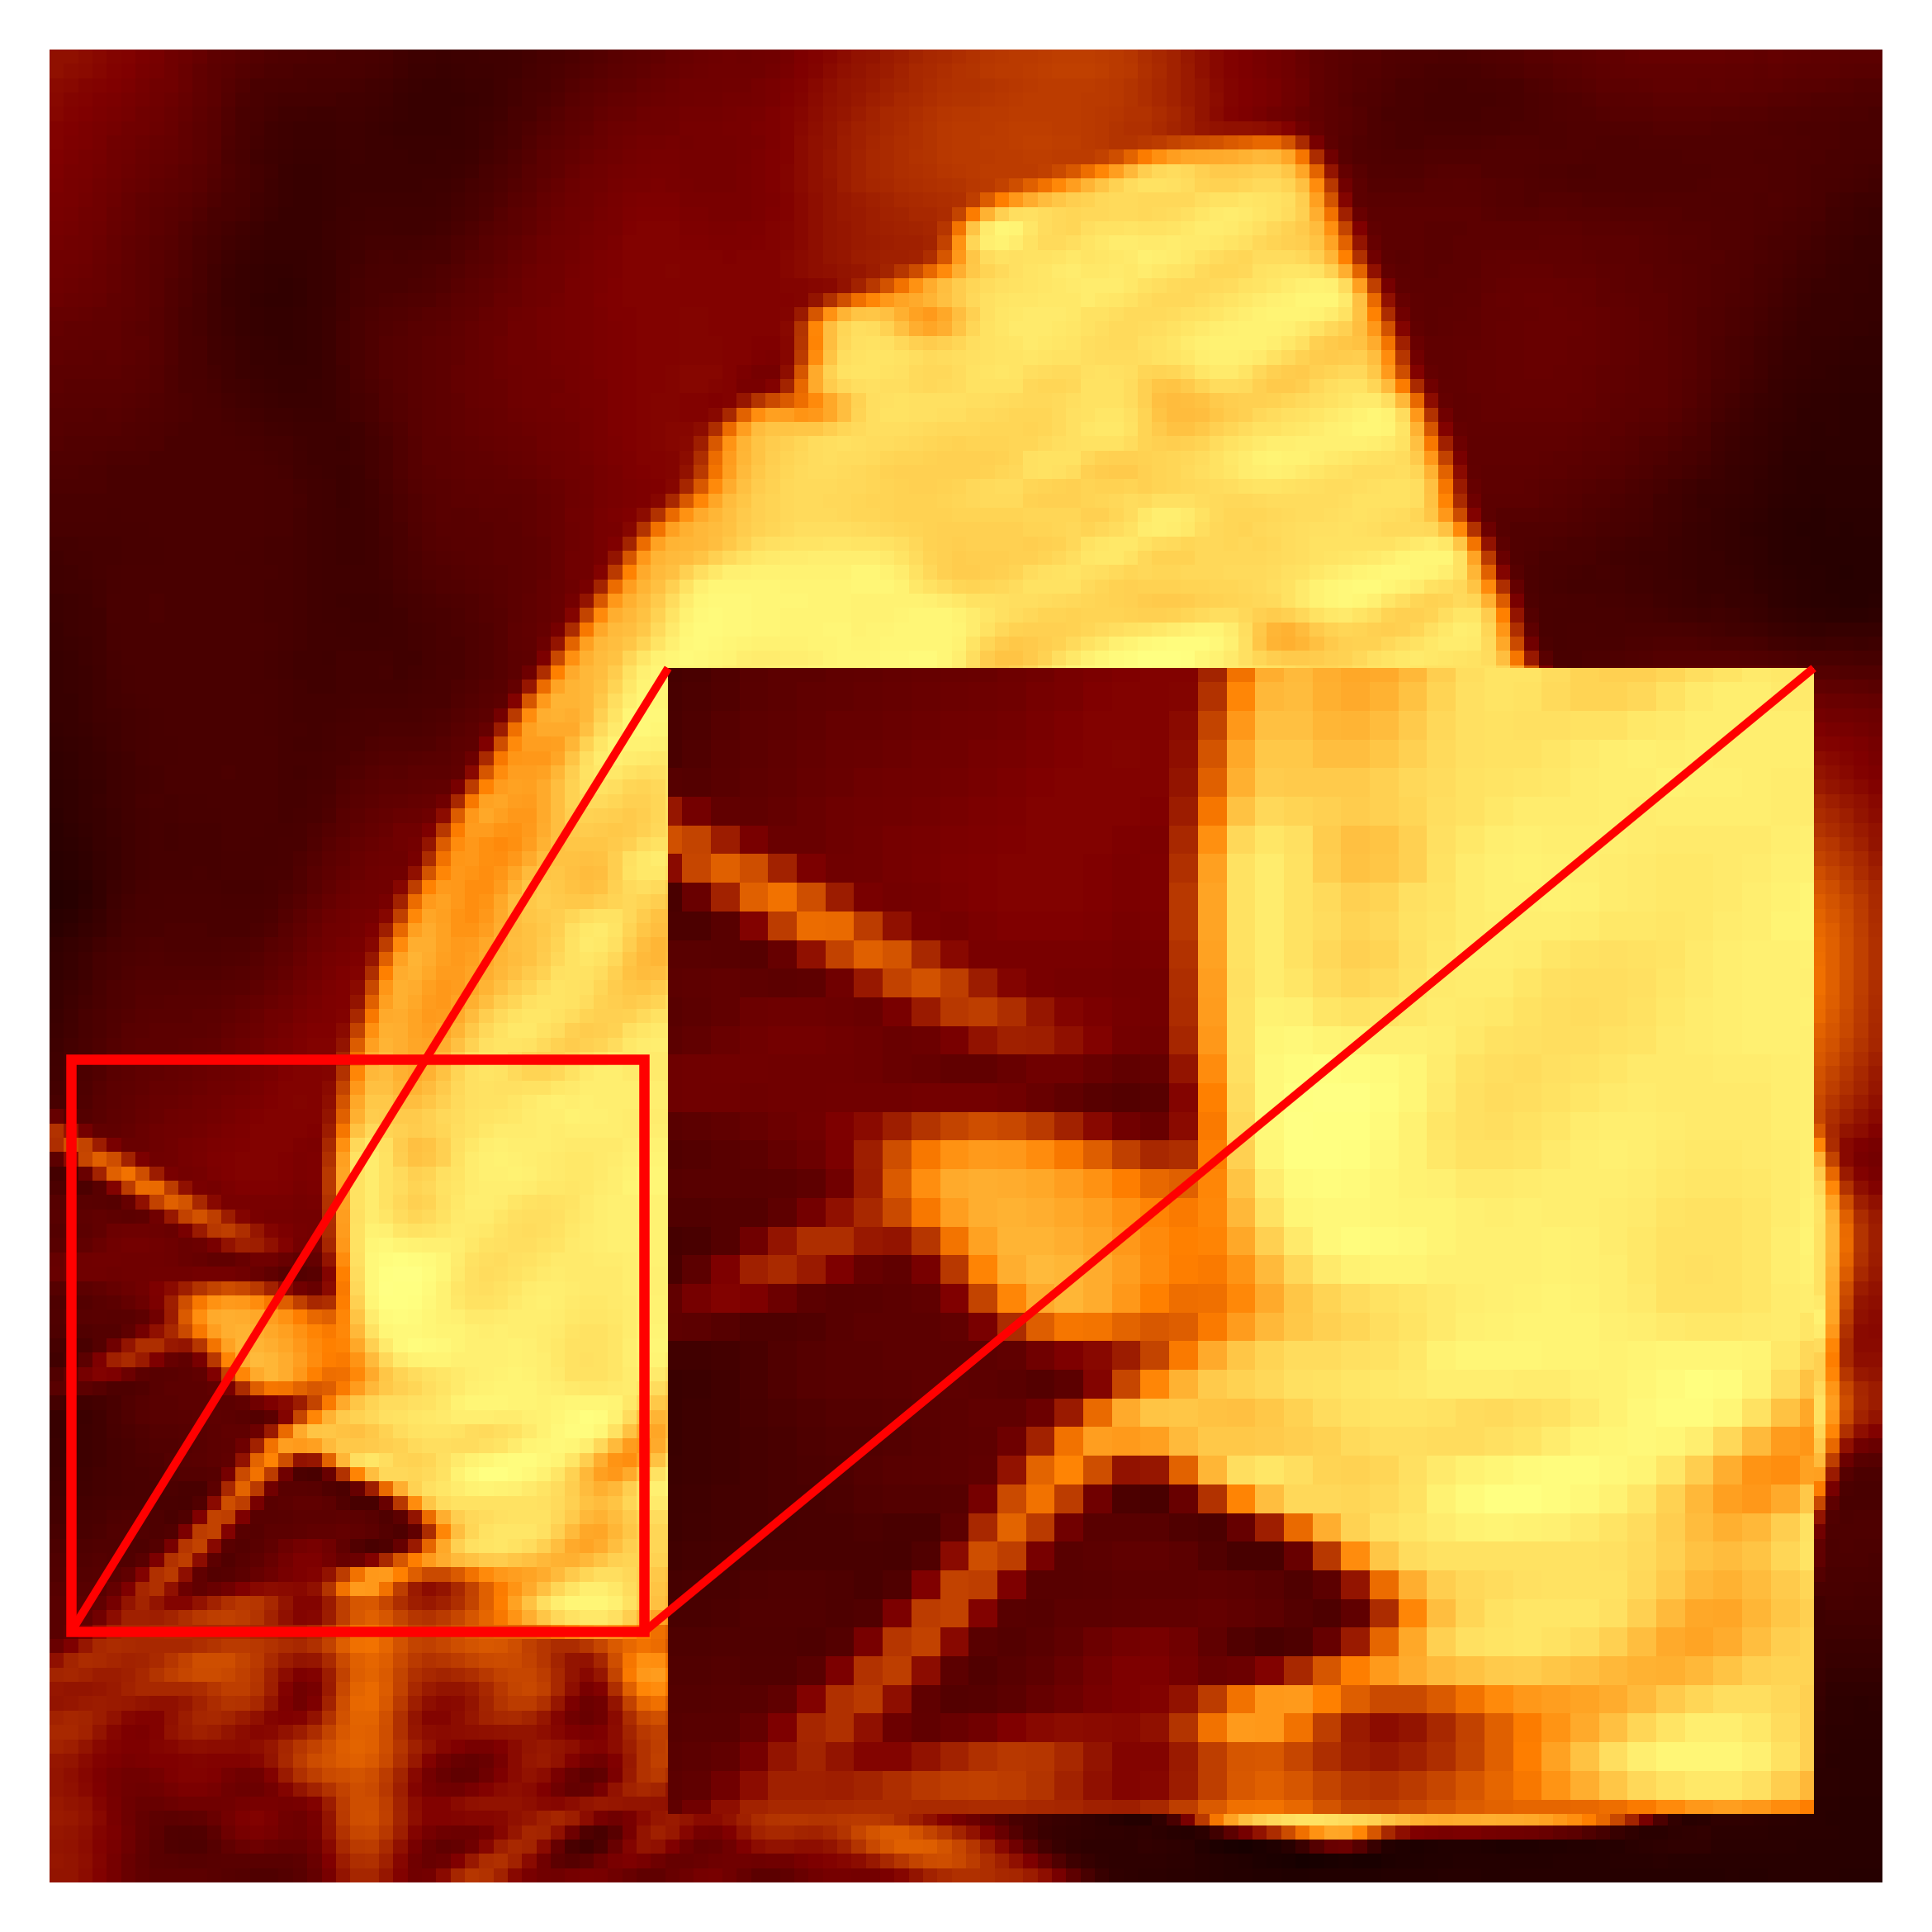

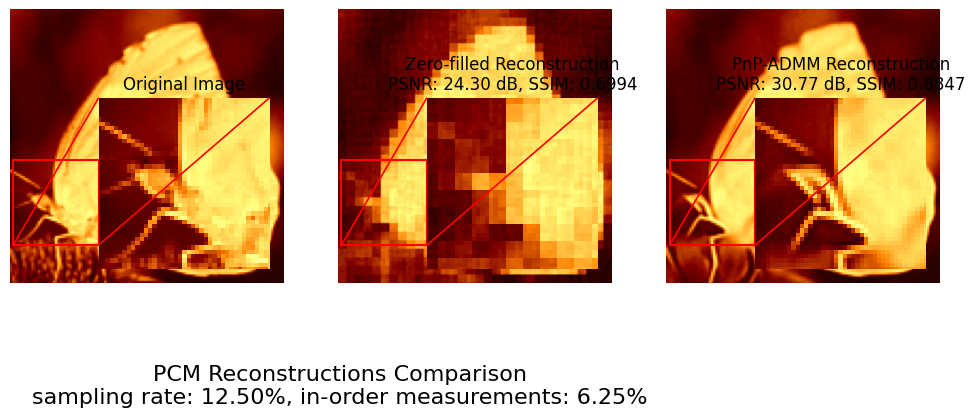

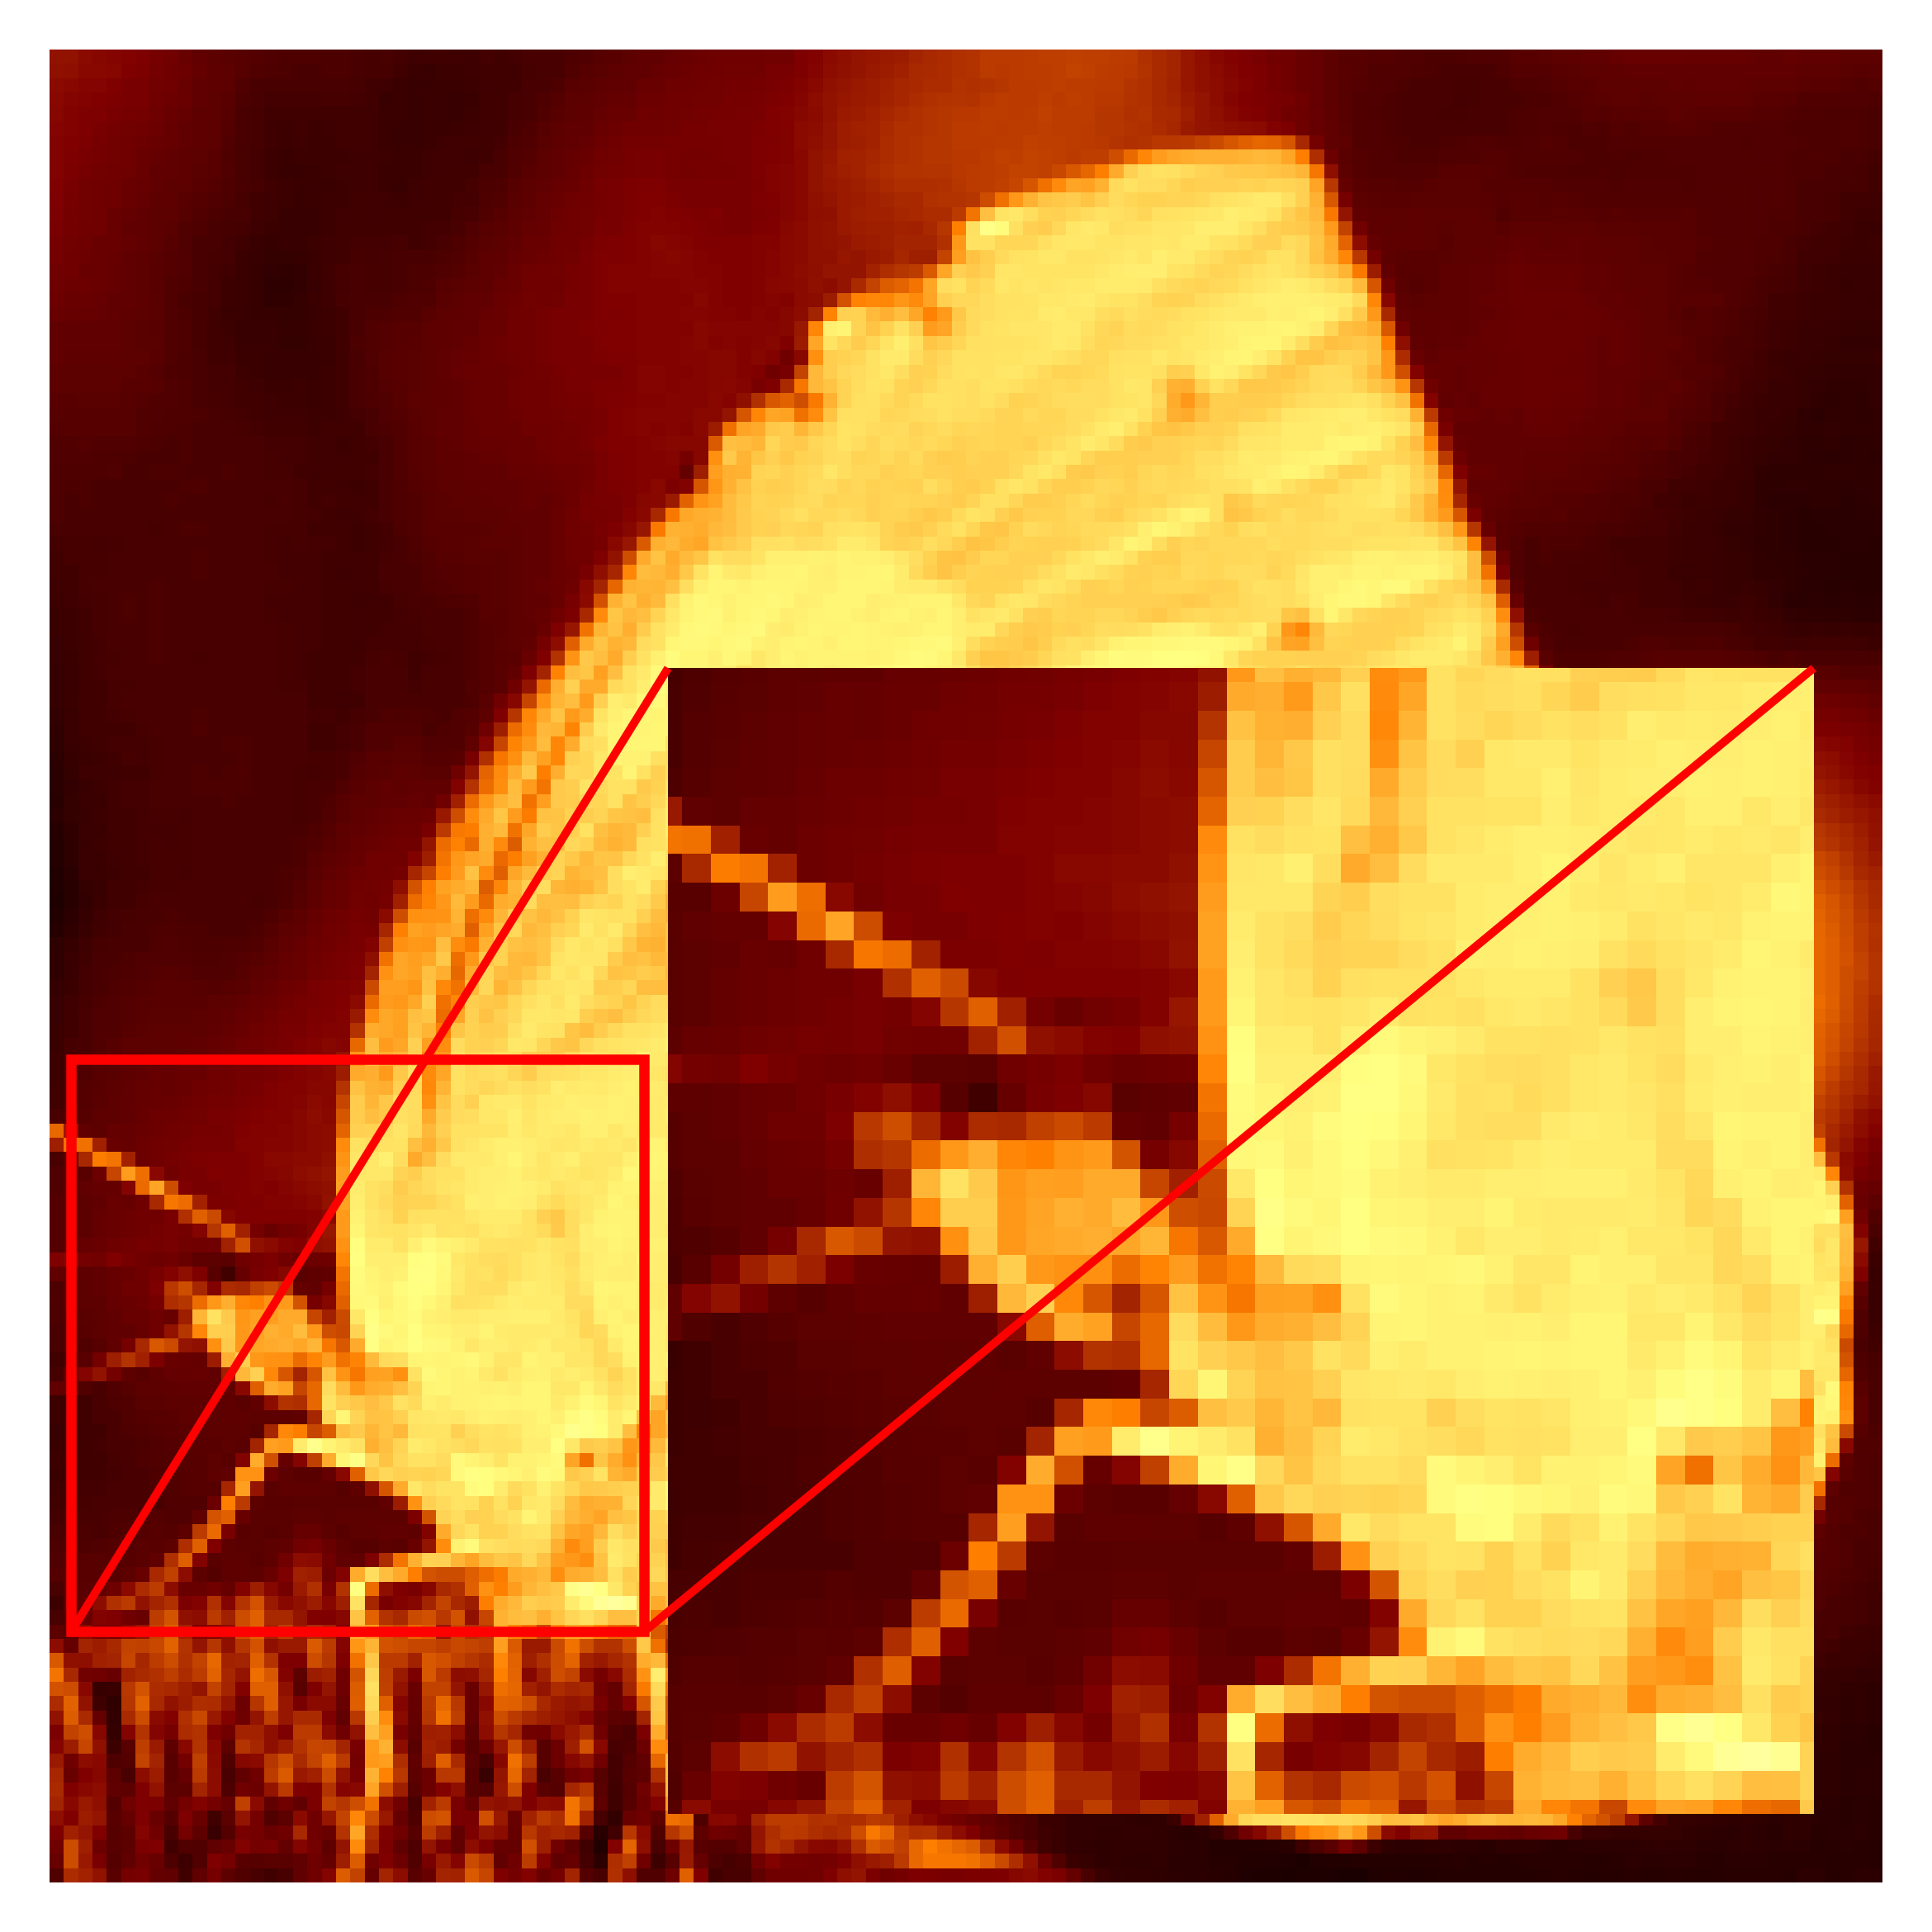

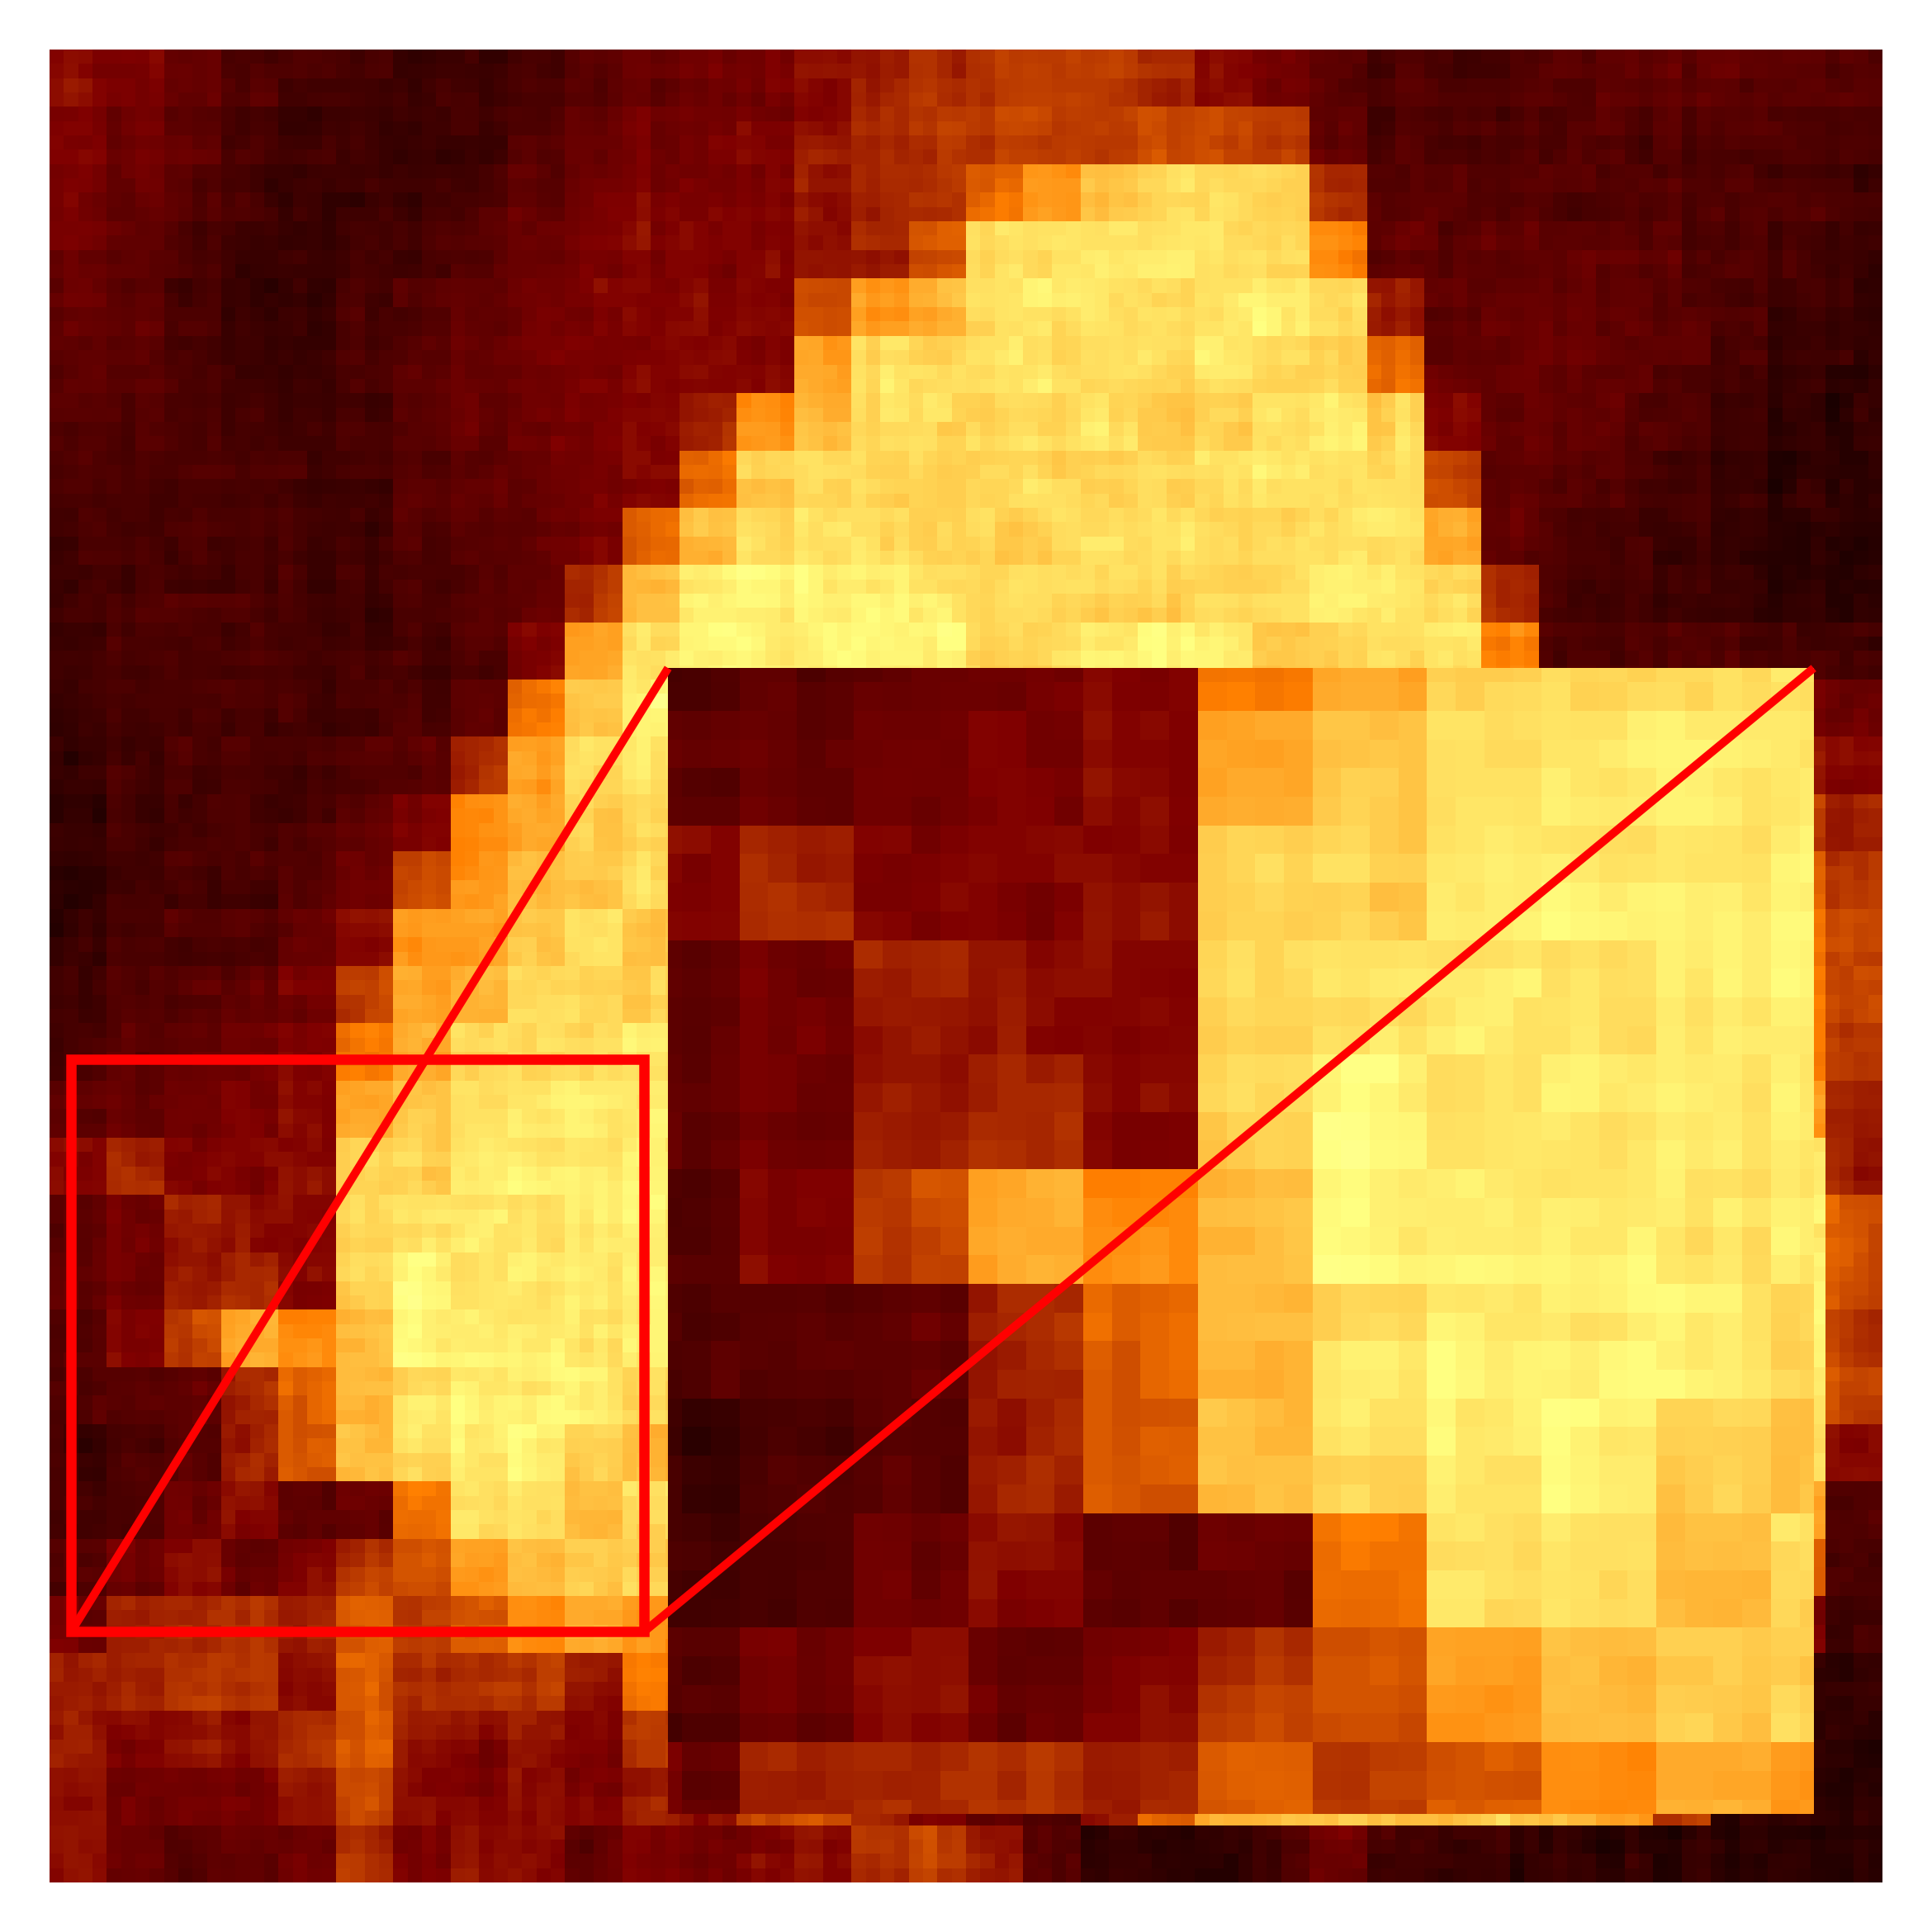

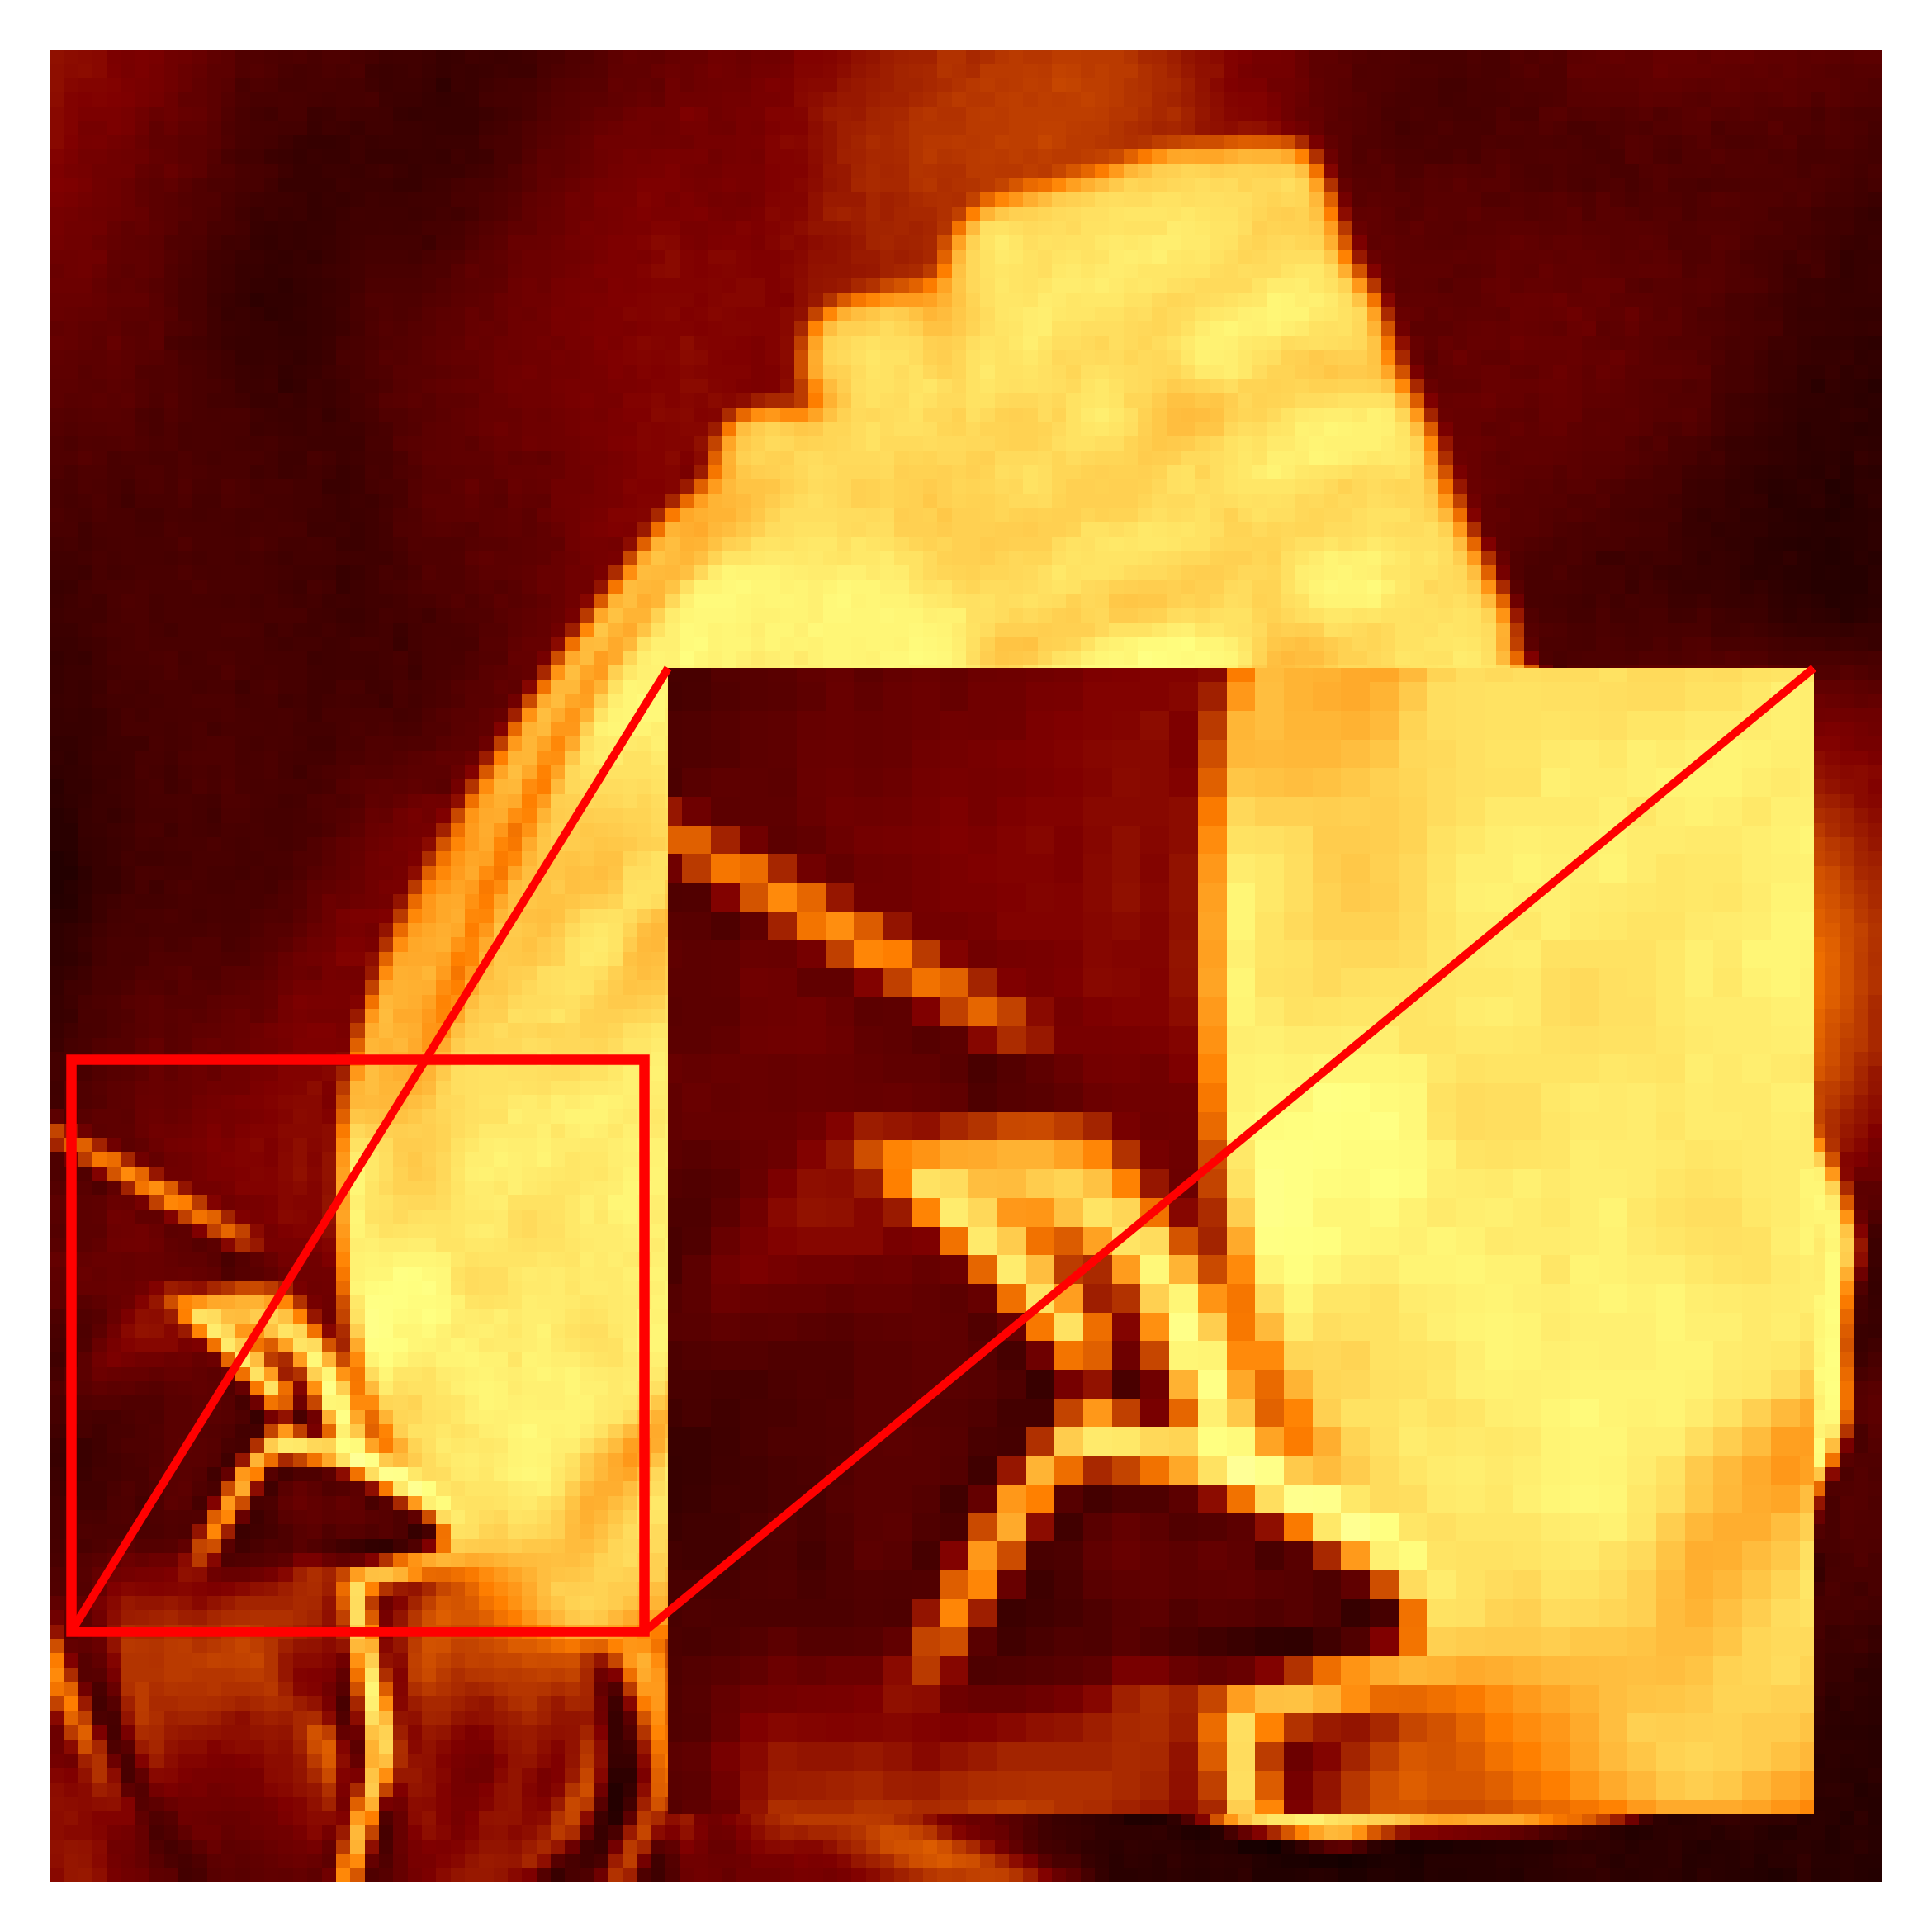

In [6]:
run_demo(plot_helper=plot_helper, im_tensor=im_tensor, J=J, data_minmax=data_minmax, subtract_from_J=1, delta_divided_by=8, sigma=50 / 255, im_name="butterfly")
run_demo(plot_helper=plot_helper, im_tensor=im_tensor, J=J, data_minmax=data_minmax, subtract_from_J=2, delta_divided_by=8, sigma=50 / 255, im_name="butterfly")

PnP-ADMM iterations: 100%|██████████| 10/10 [00:00<00:00, 12.01it/s]


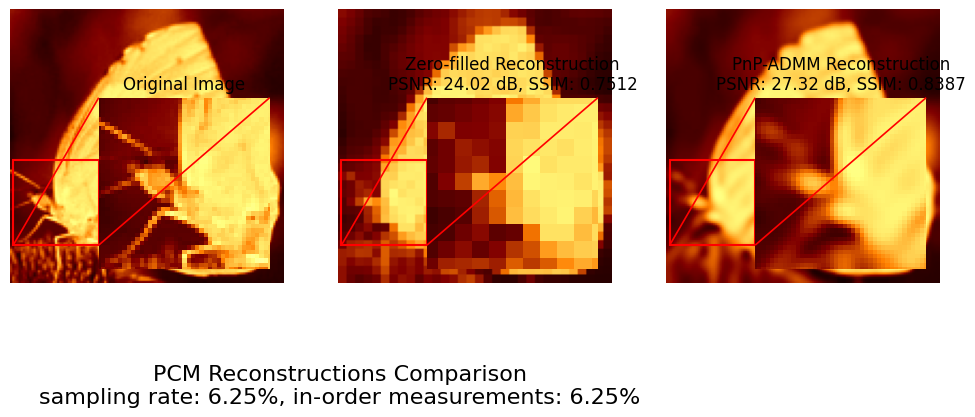

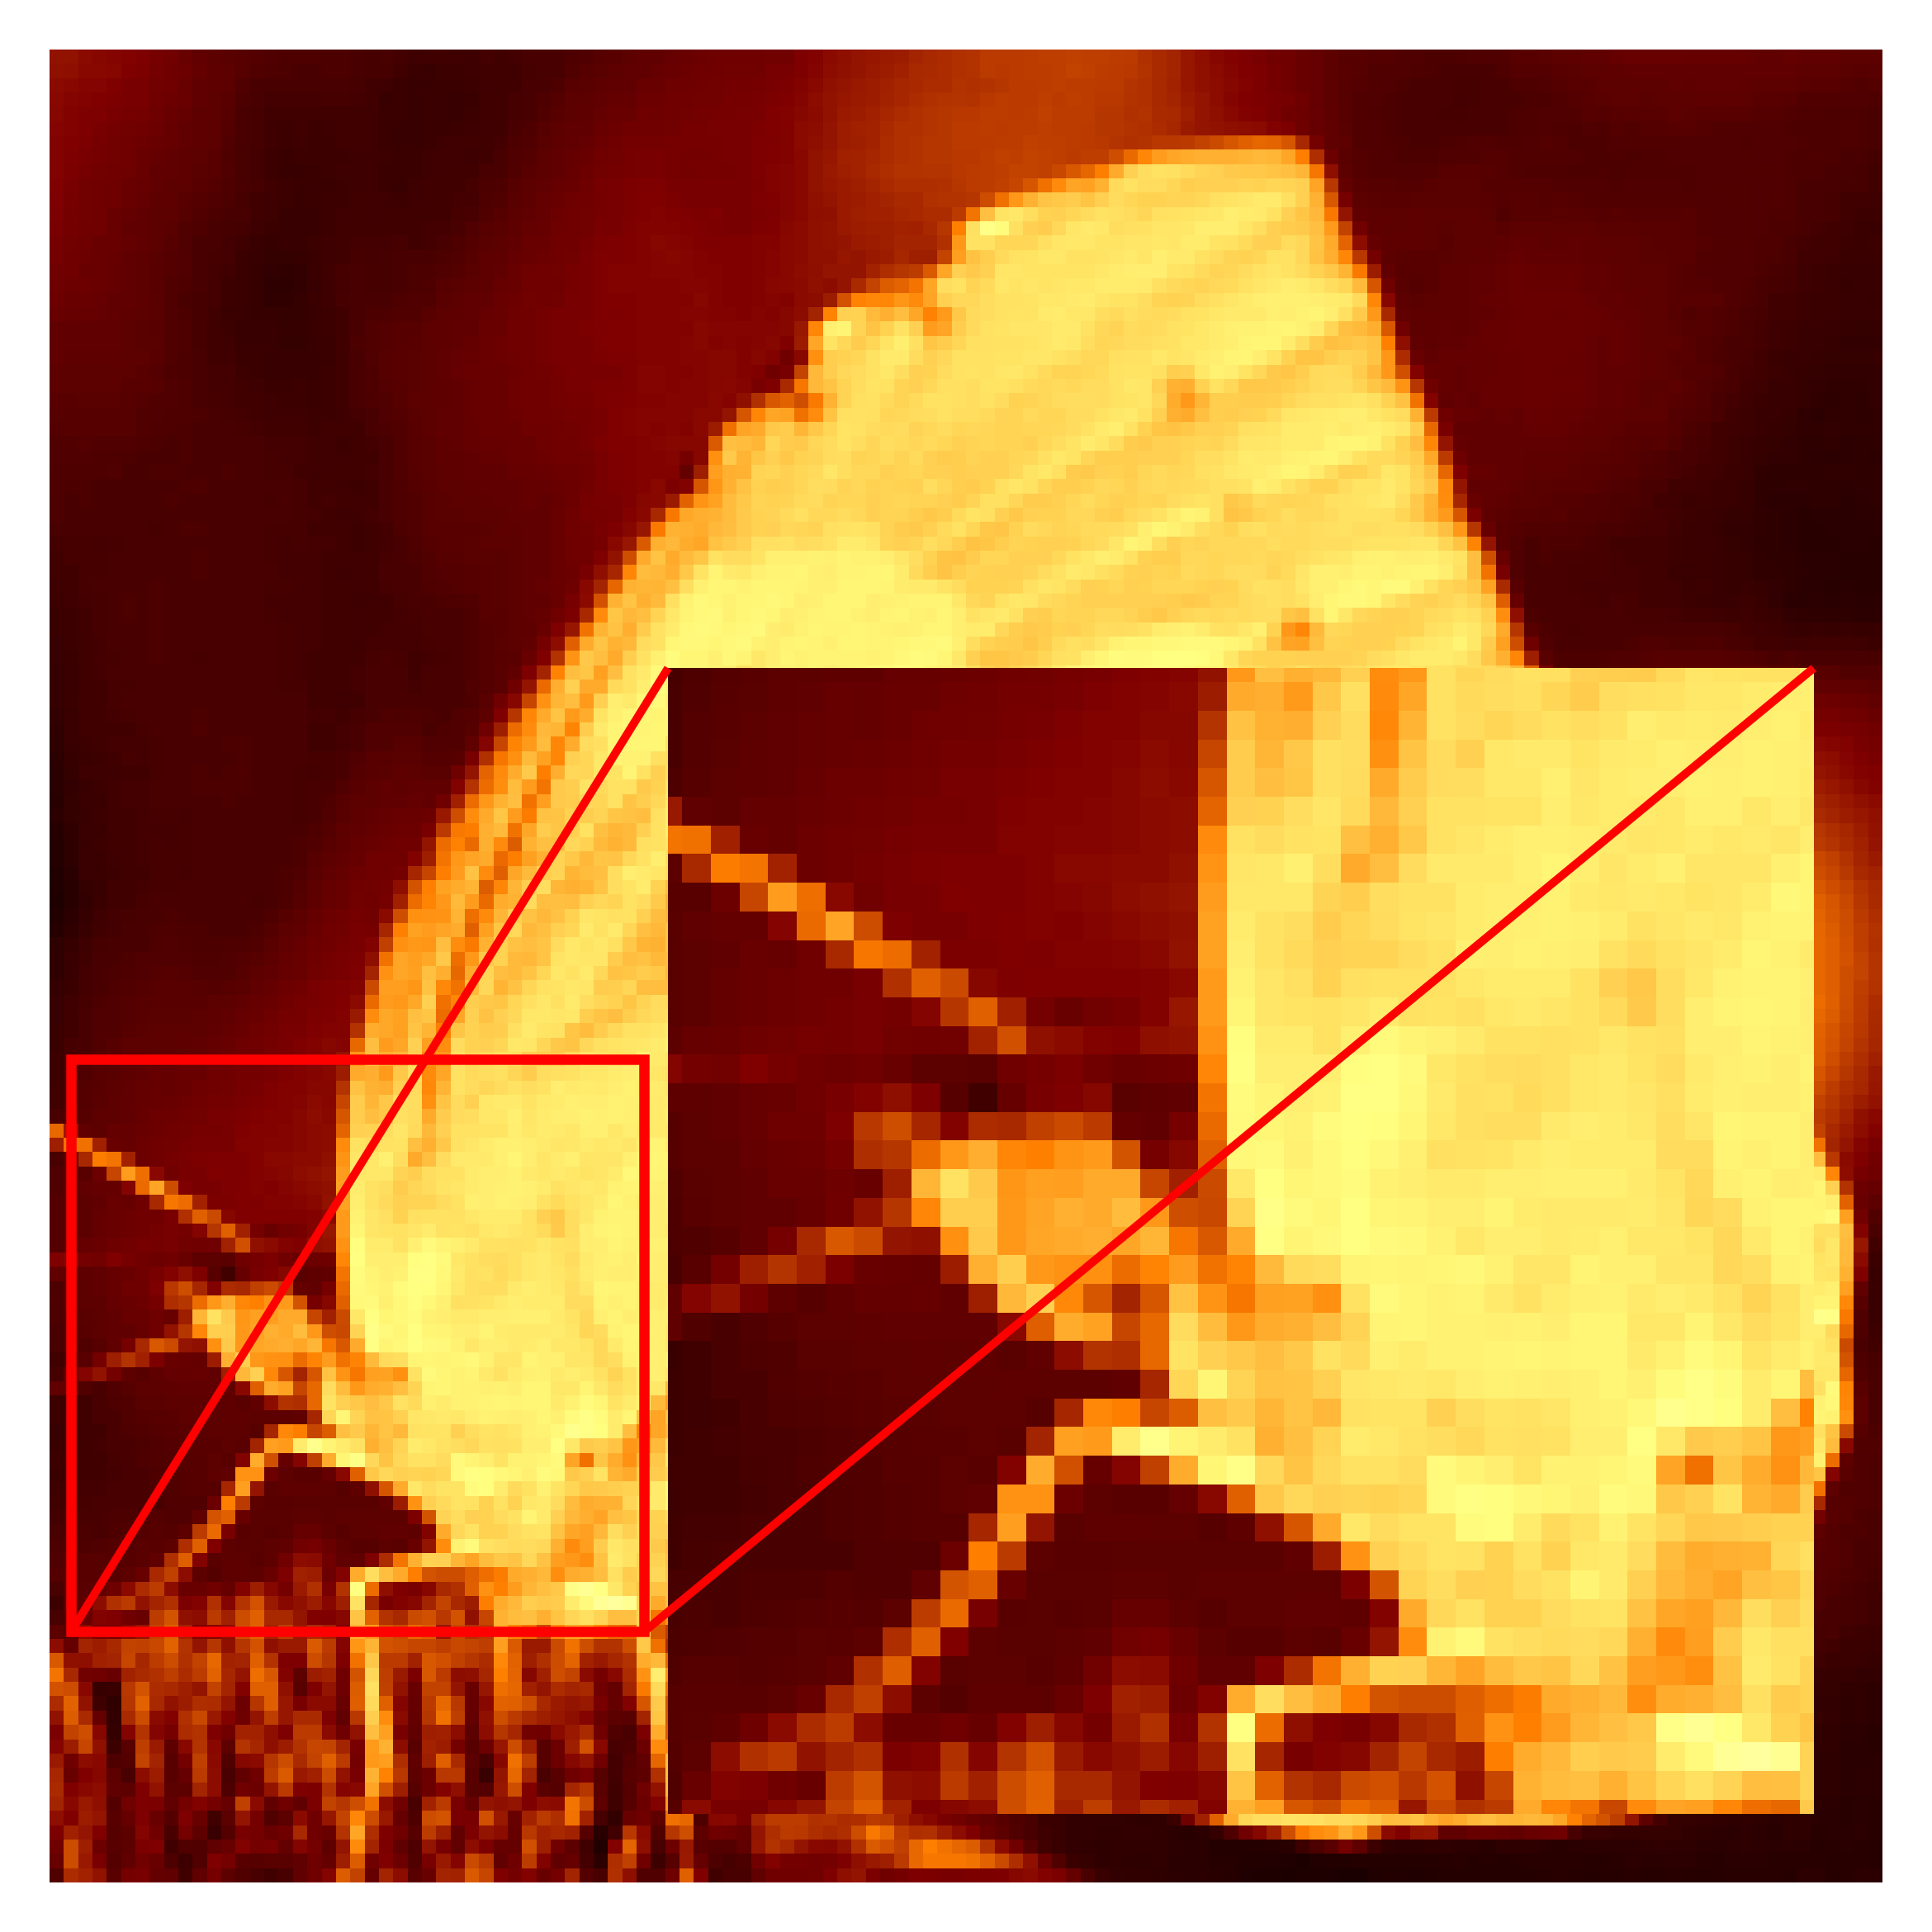

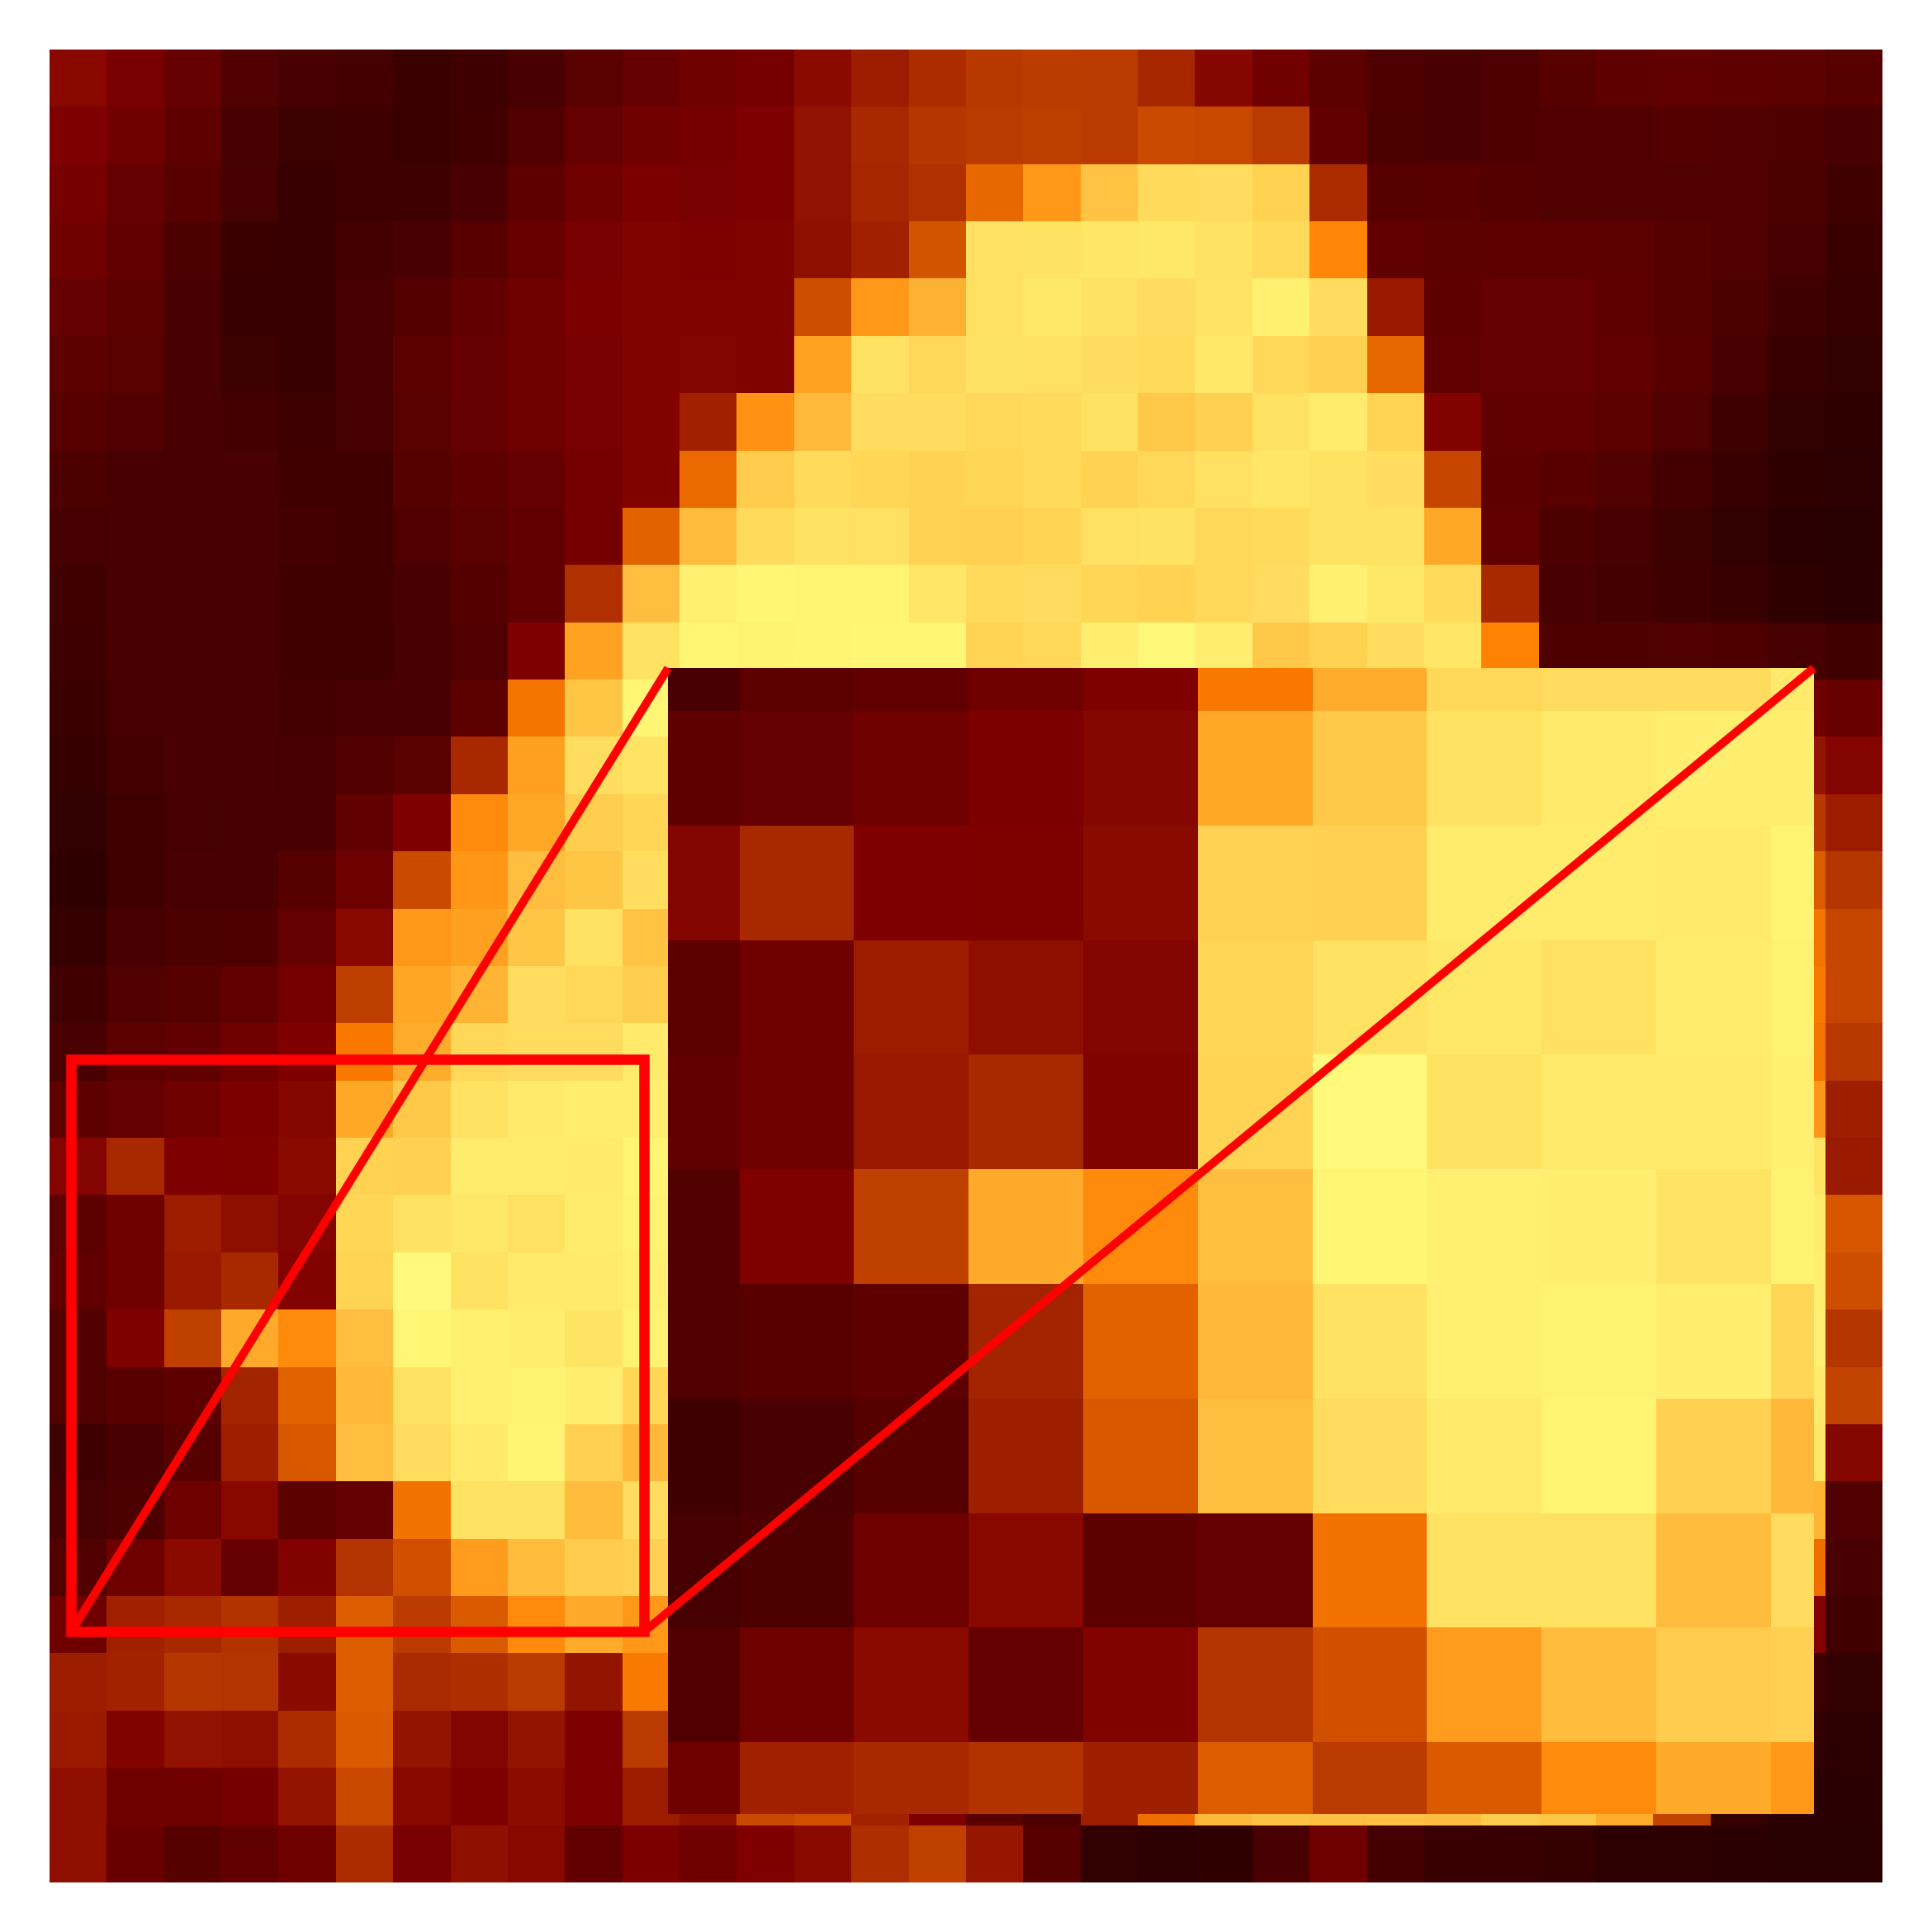

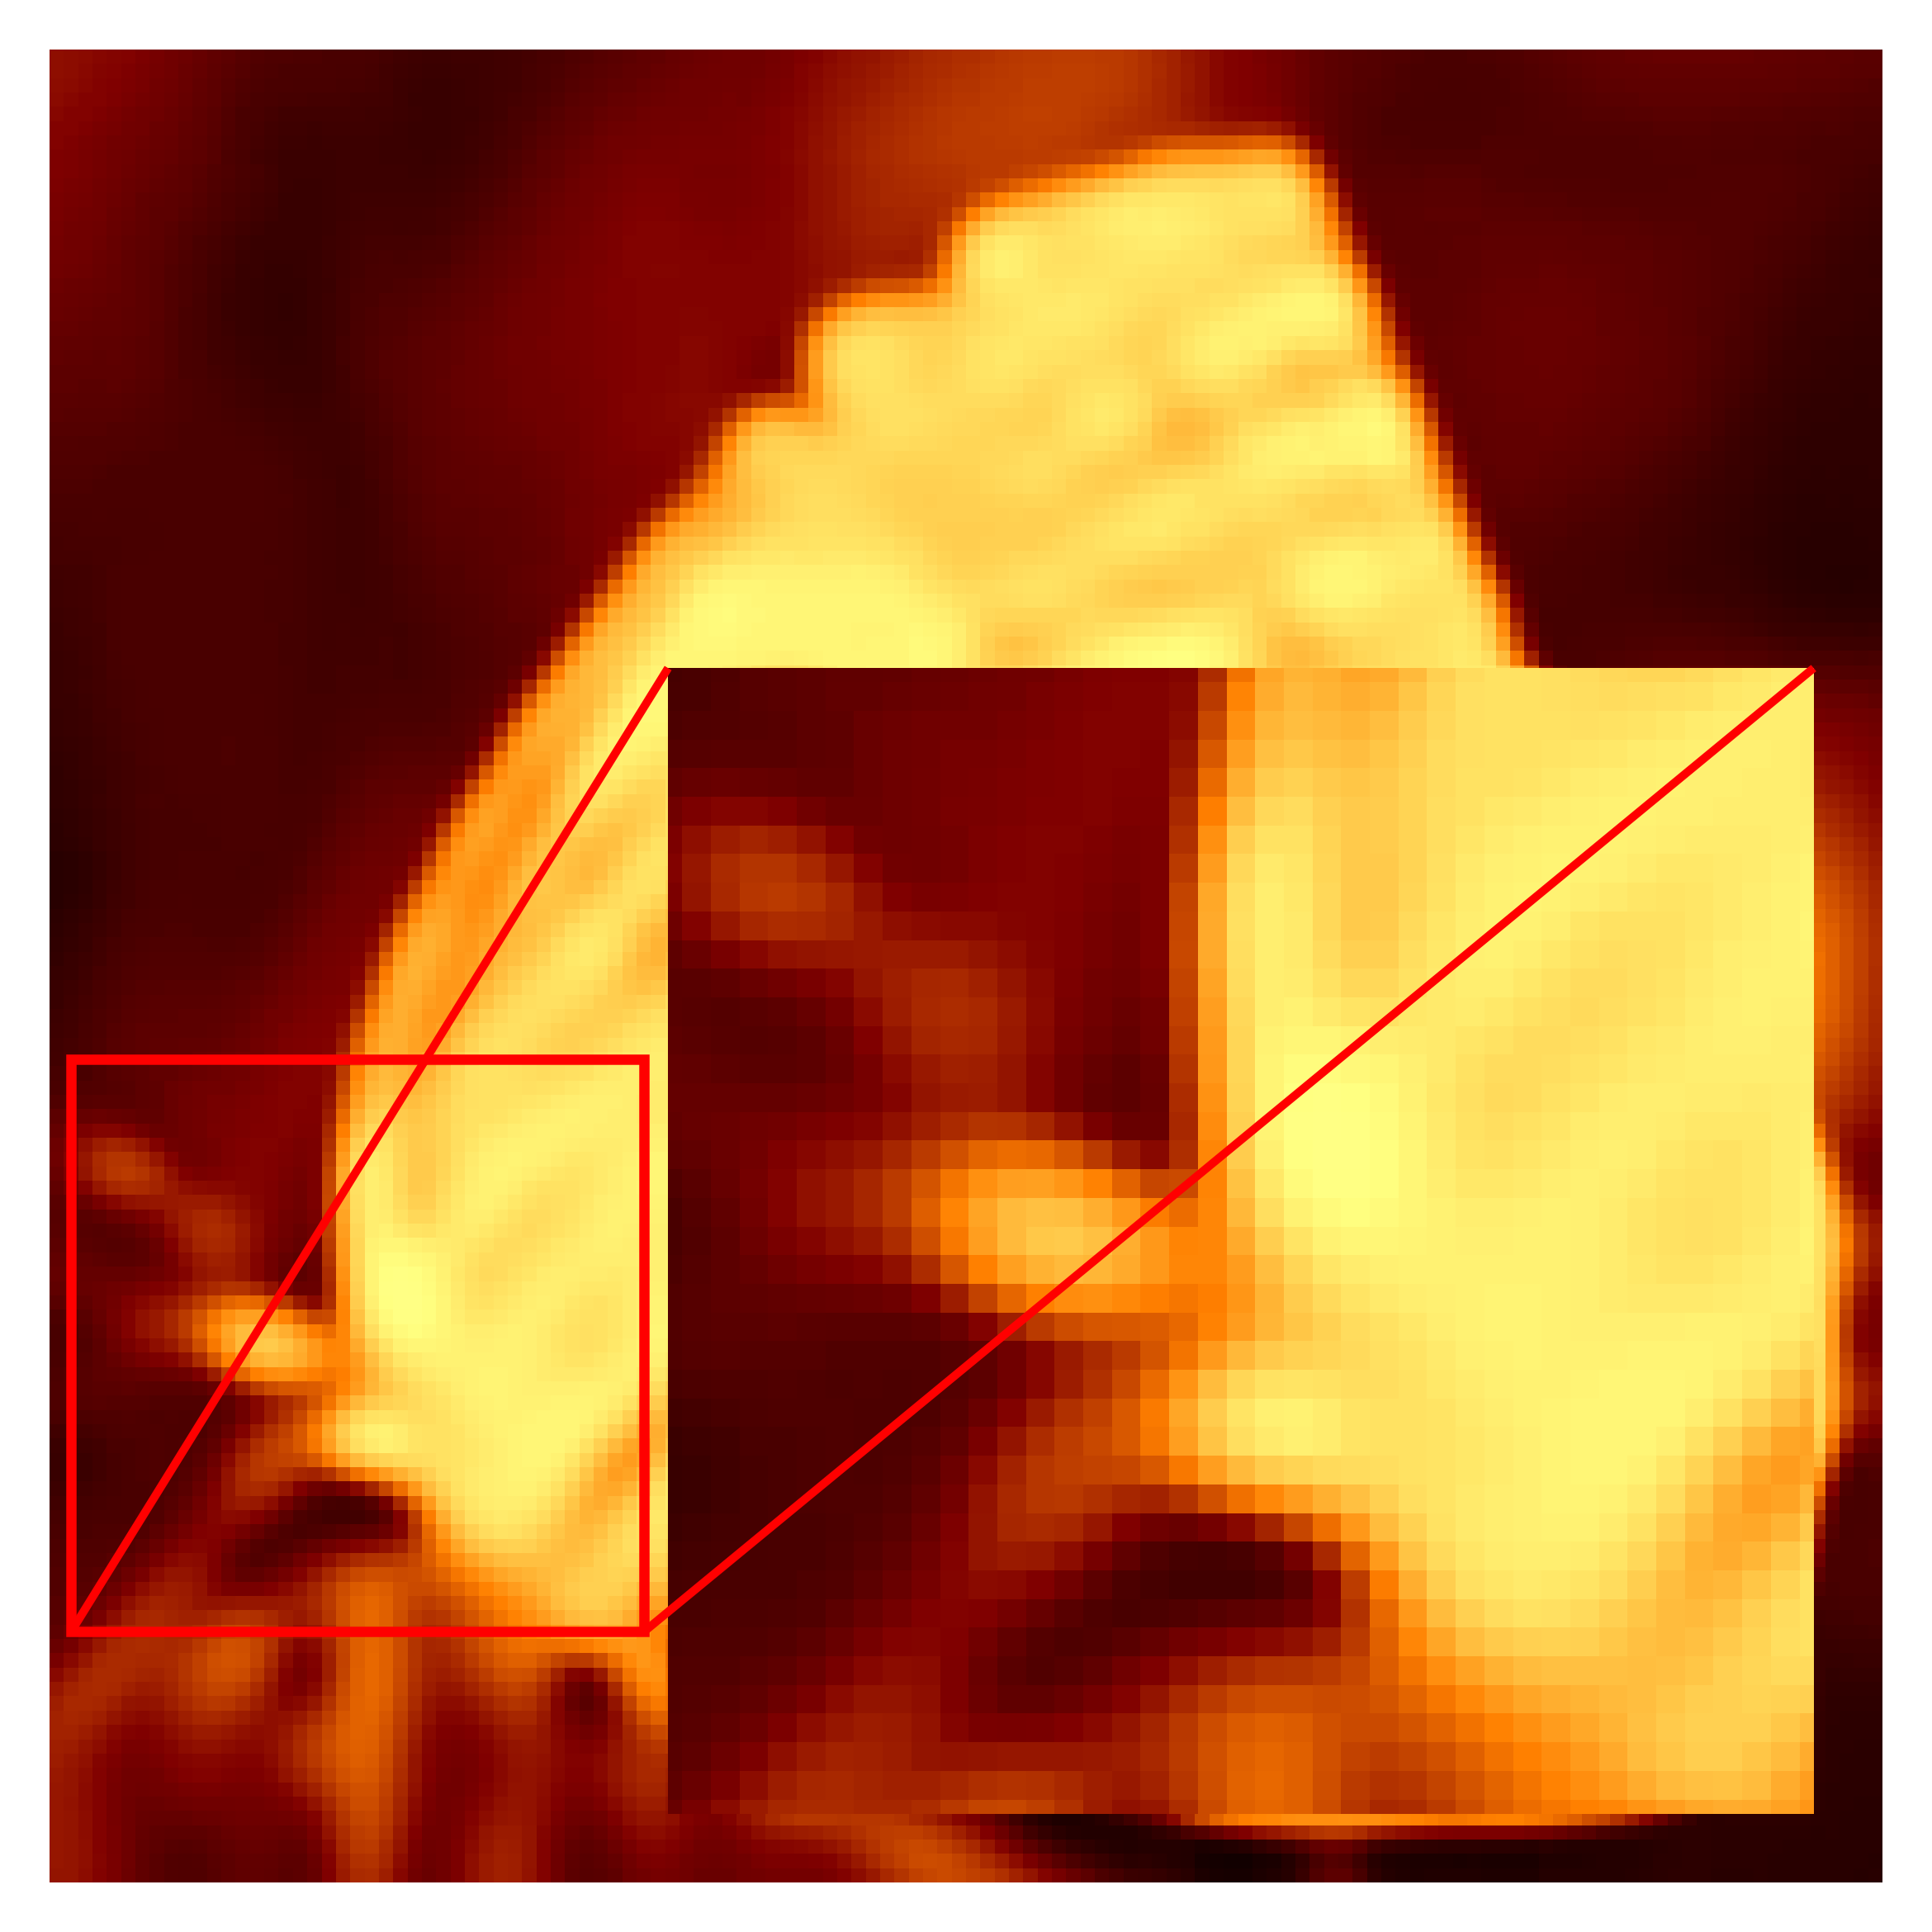

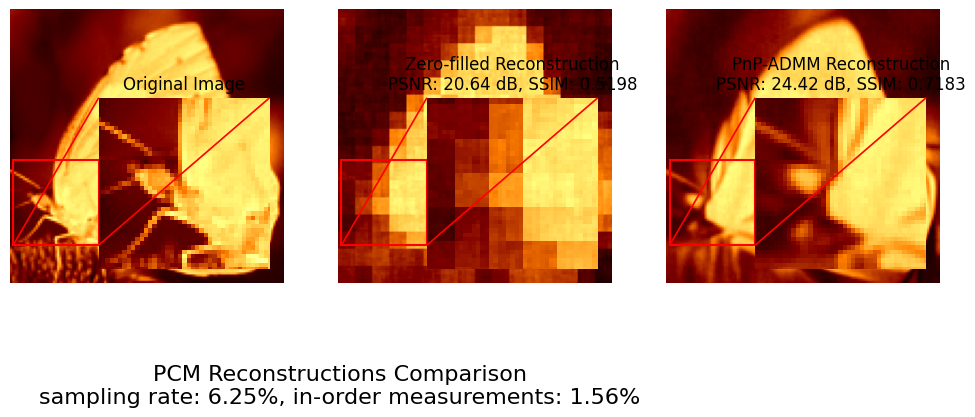

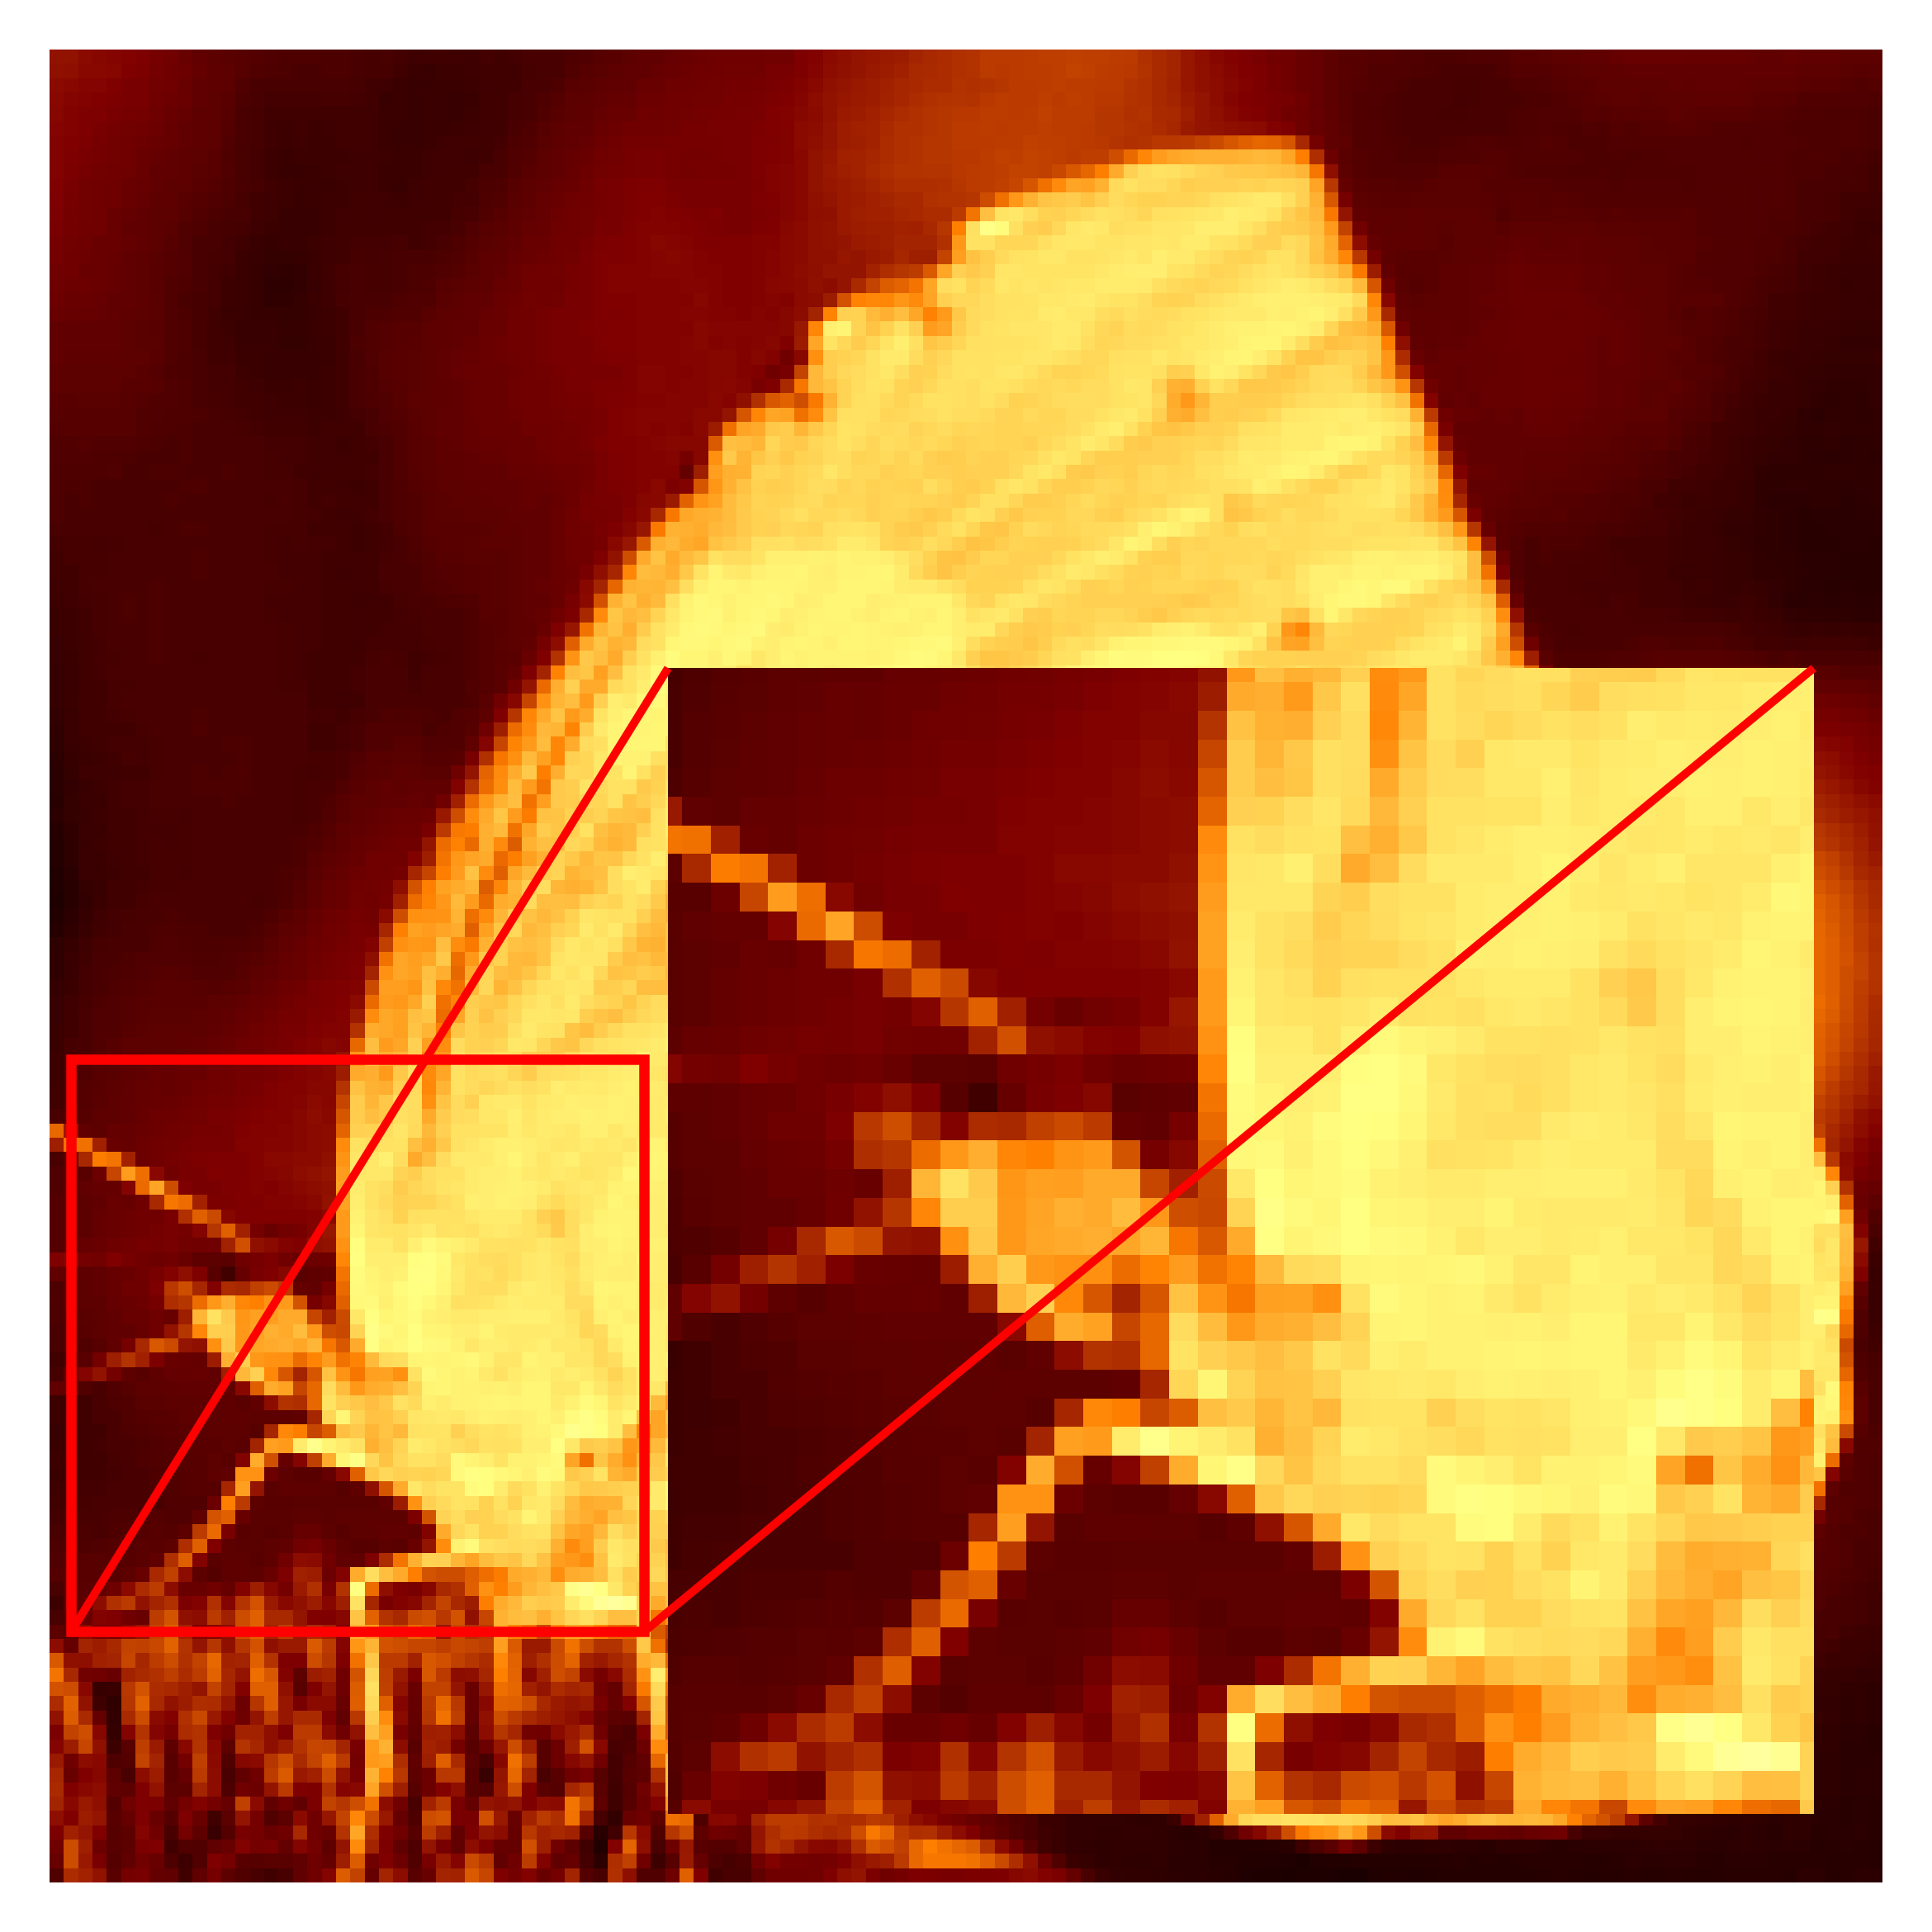

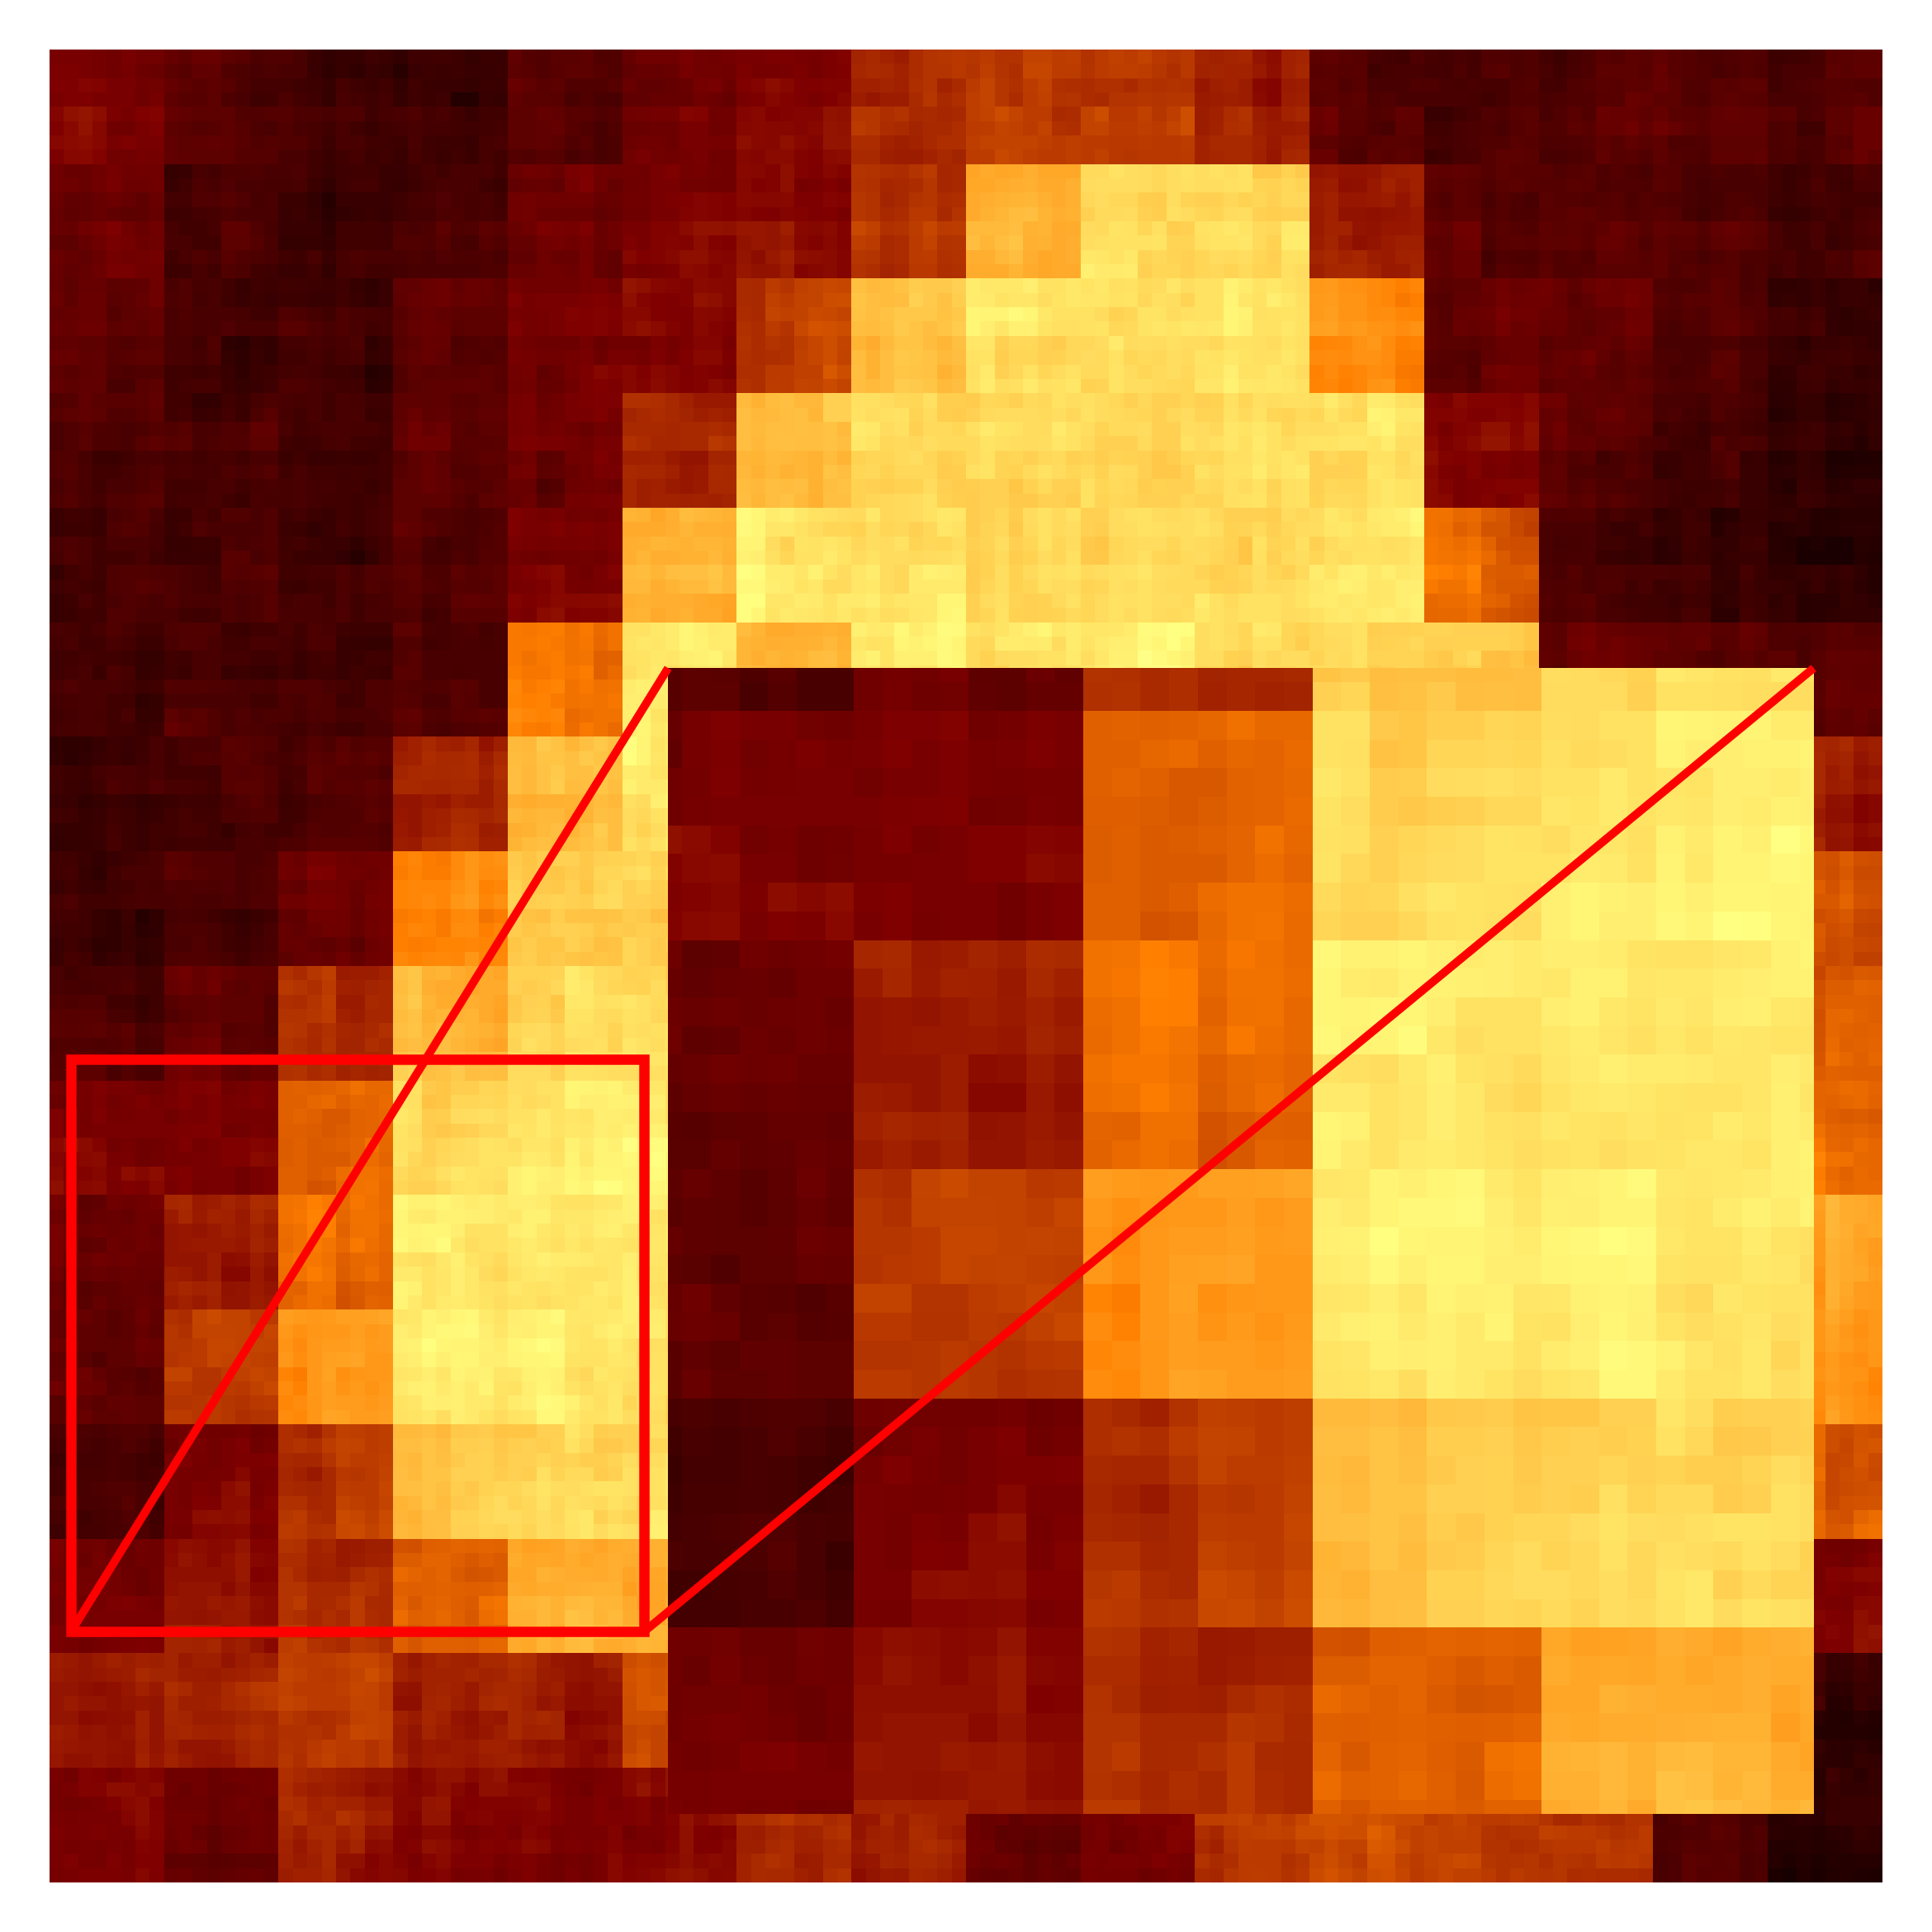

In [7]:
run_demo(plot_helper=plot_helper, im_tensor=im_tensor, J=J, data_minmax=data_minmax, subtract_from_J=2, delta_divided_by=16, sigma=50 / 255, im_name="butterfly")
run_demo(plot_helper=plot_helper, im_tensor=im_tensor, J=J, data_minmax=data_minmax, subtract_from_J=3, delta_divided_by=16, sigma=50 / 255, im_name="butterfly")